# TUTORIAL: AN√ÅLISIS EXPLORATORIO DE DATOS CON PYTHON Y PANDAS

#0. Pre-requisito

Se debe haber llevado a cabo la limpieza del set de datos.


#¬†1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telef√≥nicamente a posibles clientes para determinar si est√°n interesados o no en adquirir un certificado de dep√≥sito a t√©rmino con el banco.

¬øQu√© perfil tienen los clientes con mayor potencial de compra?

#2. El set de datos despu√©s de la limpieza

La informaci√≥n recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

Cada registro contiene 16 caracter√≠sticas (las primeras 16 columnas) y una categor√≠a ("yes" o "no" dependiendo de si la persona est√° o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (num√©rica)
2. "job": tipo de trabajo (categ√≥rica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categ√≥rica: "married", "divorced", "single")
4. "education": nivel educativo (categ√≥rica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dej√≥ de pagar sus obligaciones (categ√≥rica: "yes", "no")
6. "balance": saldo promedio anual en euros (num√©rica)
7. "housing": ¬øtiene o no cr√©dito hipotecario? (categ√≥rica: "yes", "no")
8. "loan": ¬øtiene cr√©ditos de consumo? (categ√≥rica: "yes", "no")
9. "contact": medio a trav√©s del cual fue contactado (categ√≥rica: "unknown", "telephone", "cellular")
10. "day": √∫ltimo d√≠a del mes en el que fue contactada (num√©rica)
11. "month": √∫ltimo mes en el que fue contactada (categ√≥rica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duraci√≥n (en segundos) del √∫ltimo contacto (num√©rica)
13. "campaign": n√∫mero total de veces que fue contactada durante la campa√±a (num√©rica)
14. "pdays": n√∫mero de d√≠as transcurridos despu√©s de haber sido contactado antes de la campa√±a actual (num√©rica. -1 indica que no fue contactado previamente)
15. "previous": n√∫mero de veces que ha sido contactada antes de esta campa√±a (num√©rica)
16. "poutcome": resultado de la campa√±a de marketing anterior (categ√≥rica: "unknown", "other", "failure", "success")
17. "y": categor√≠a ¬øel cliente se suscribi√≥ a un dep√≥sito a t√©rmino? (categ√≥rica: "yes", "no")

#3. Lectura del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bancos_clean = pd.read_csv('../documentos/dataset_banco_clean.csv')
df_bancos_clean

age           job   marital  education default  balance housing loan  \
0       58    Management   Married   Tertiary      No   2143.0     Yes   No   
1       44    Technician    Single  Secondary      No     29.0     Yes   No   
2       33  Entrepreneur   Married  Secondary      No      2.0     Yes  Yes   
3       47   Blue-collar   Married    Unknown      No   1506.0     Yes   No   
4       33       Unknown    Single    Unknown      No      1.0      No   No   
...    ...           ...       ...        ...     ...      ...     ...  ...   
44979   51    Technician   Married   Tertiary      No    825.0      No   No   
44980   71       Retired  Divorced    Primary      No   1729.0      No   No   
44981   72       Retired   Married  Secondary      No   5715.0      No   No   
44982   57   Blue-collar   Married  Secondary      No    668.0      No   No   
44983   37  Entrepreneur   Married  Secondary      No   2971.0      No   No   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        Unknown    5   May     261.0         1   -1.0         0  Unknown   No  
1        Unknown    5   May     151.0         1   -1.0         0  Unknown   No  
2        Unknown    5   May      76.0         1   -1.0         0  Unknown   No  
3        Unknown    5   May      92.0         1   -1.0         0  Unknown   No  
4        Unknown    5   May     198.0         1   -1.0         0  Unknown   No  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
44979   Cellular   17   Nov     977.0         3   -1.0         0  Unknown  Yes  
44980   Cellular   17   Nov     456.0         2   -1.0         0  Unknown  Yes  
44981   Cellular   17   Nov    1127.0         5  184.0         3  Success  Yes  
44982  Telephone   17   Nov     508.0         4   -1.0         0  Unknown   No  
44983   Cellular   17   Nov     361.0         2  188.0        11    Other   No  

[44984 rows x 17 columns]

In [3]:
df_bancos_clean.shape

(44984, 17)

In [4]:
df_bancos_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44984 entries, 0 to 44983
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        44984 non-null  int64  
 1   job        44984 non-null  object 
 2   marital    44984 non-null  object 
 3   education  44984 non-null  object 
 4   default    44984 non-null  object 
 5   balance    44984 non-null  float64
 6   housing    44984 non-null  object 
 7   loan       44984 non-null  object 
 8   contact    44984 non-null  object 
 9   day        44984 non-null  int64  
 10  month      44984 non-null  object 
 11  duration   44984 non-null  float64
 12  campaign   44984 non-null  int64  
 13  pdays      44984 non-null  float64
 14  previous   44984 non-null  int64  
 15  poutcome   44984 non-null  object 
 16  y          44984 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.8+ MB


#4. An√°lisis exploratorio

La idea es usar herramientas estad√≠sticas y de visualizaci√≥n para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¬øqu√© perfil tienen los clientes con mayor potencial de conversi√≥n?)

Llevaremos a cabo estas fases:

1. An√°lisis de cada variable de manera individual
2. An√°lisis univariado: relaci√≥n de cada variable predictora con la variable a predecir

##4.1 An√°lisis de cada variable de manera individual

Nos permite entender las caracter√≠sticas generales de cada variable de nuestro set de datos.

In [5]:
# Columnas: Categ√≥ricas y num√©ricas
columnas = list(df_bancos_clean.keys())
cols_categ = [x for x in columnas if df_bancos_clean[x].dtype == 'object']
cols_num = [x for x in columnas if df_bancos_clean[x].dtype != 'object']

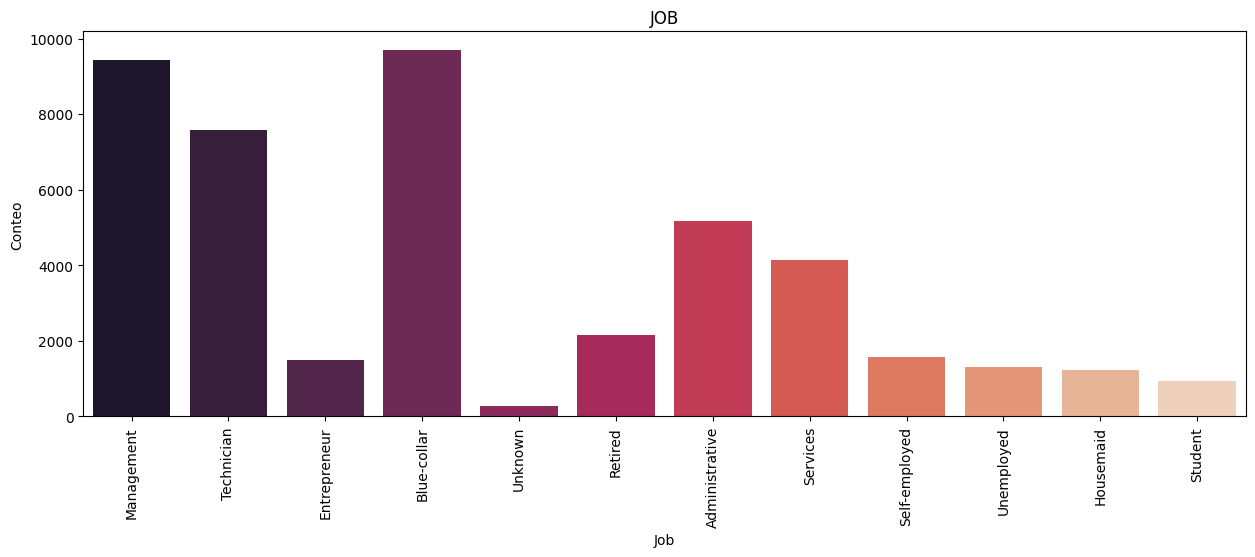

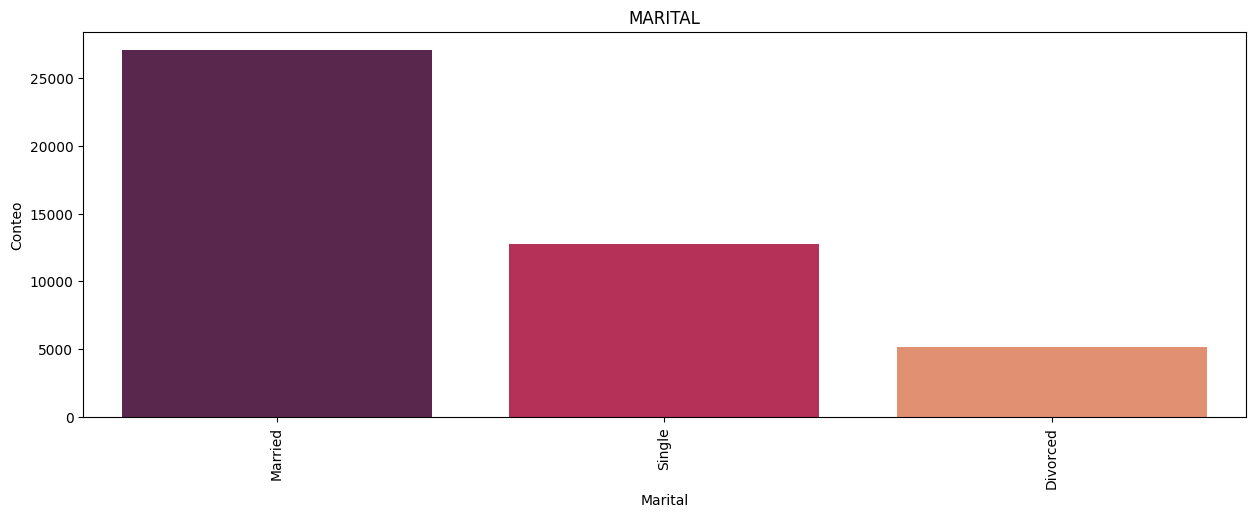

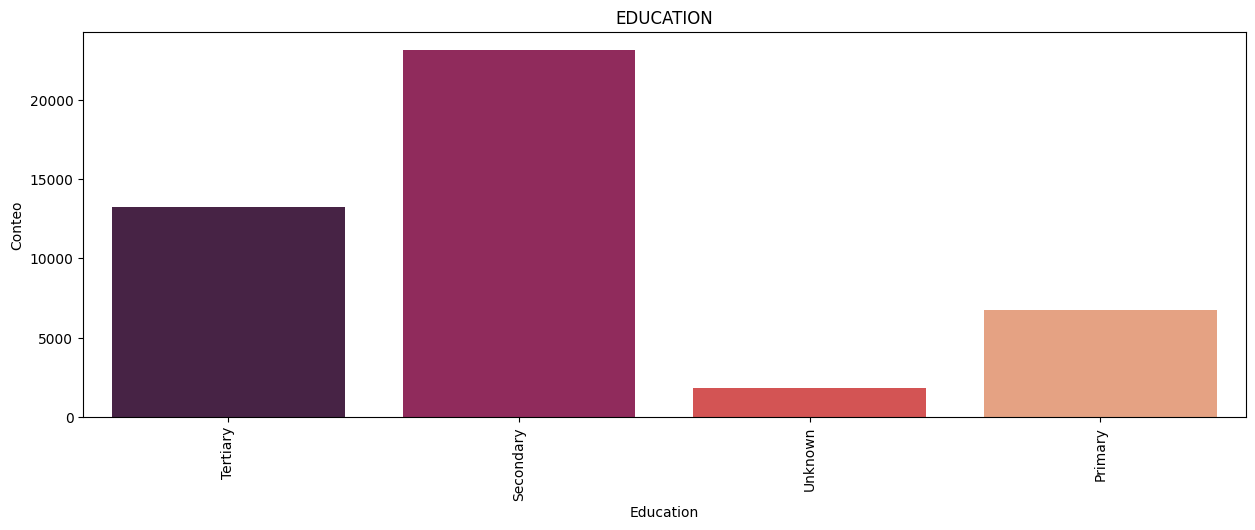

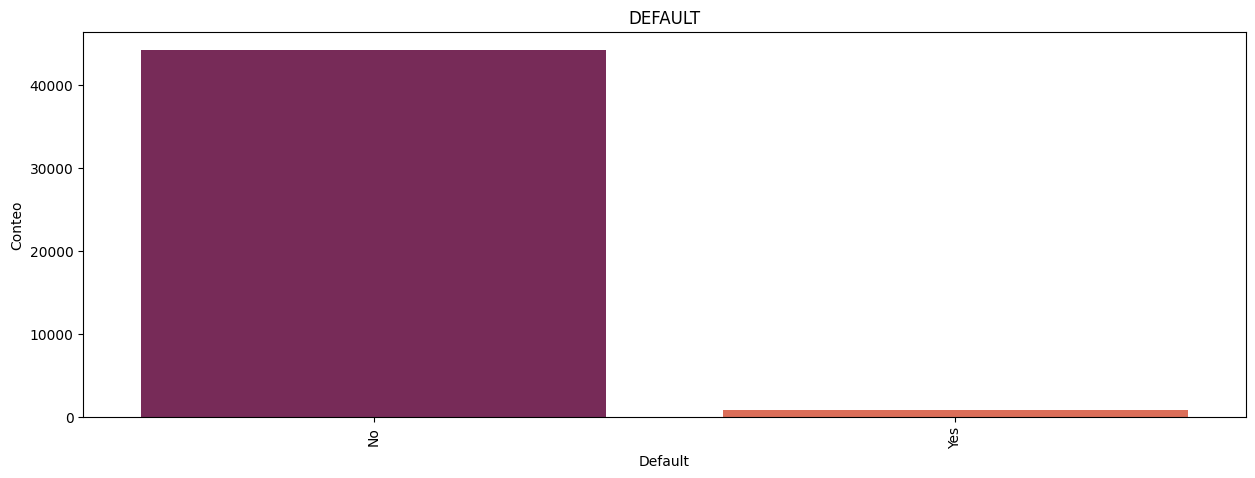

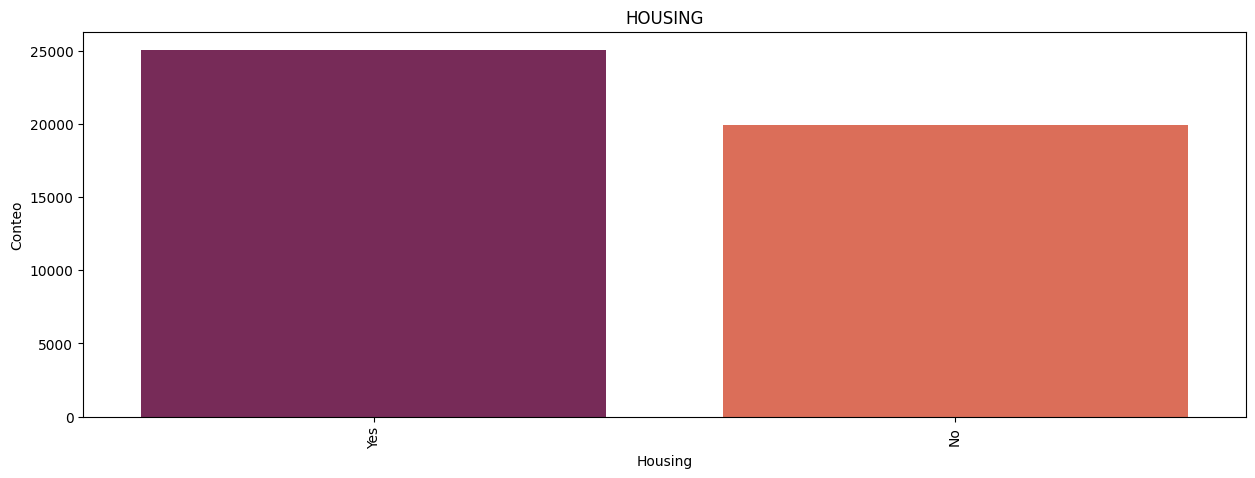

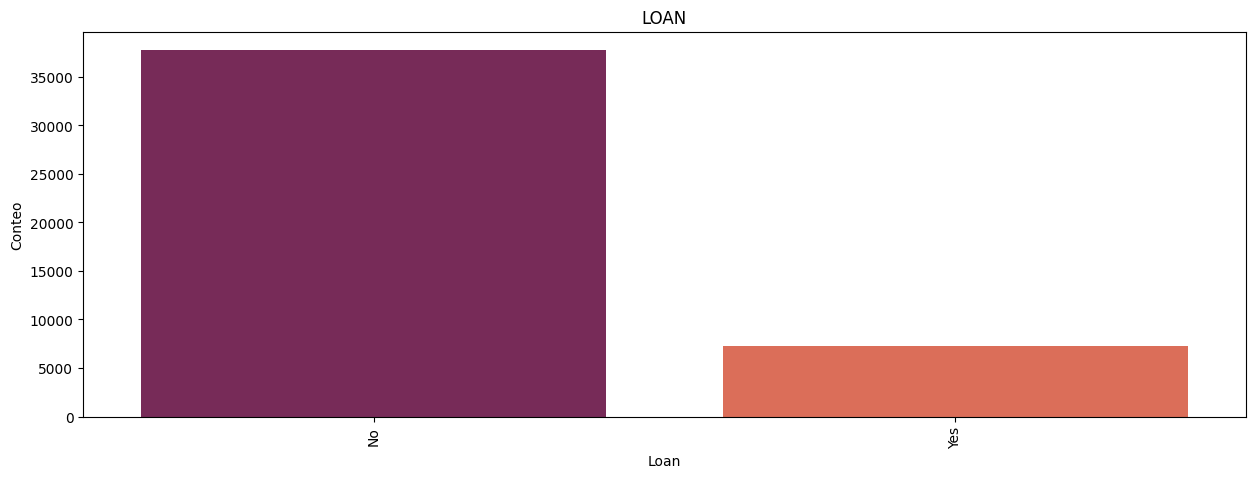

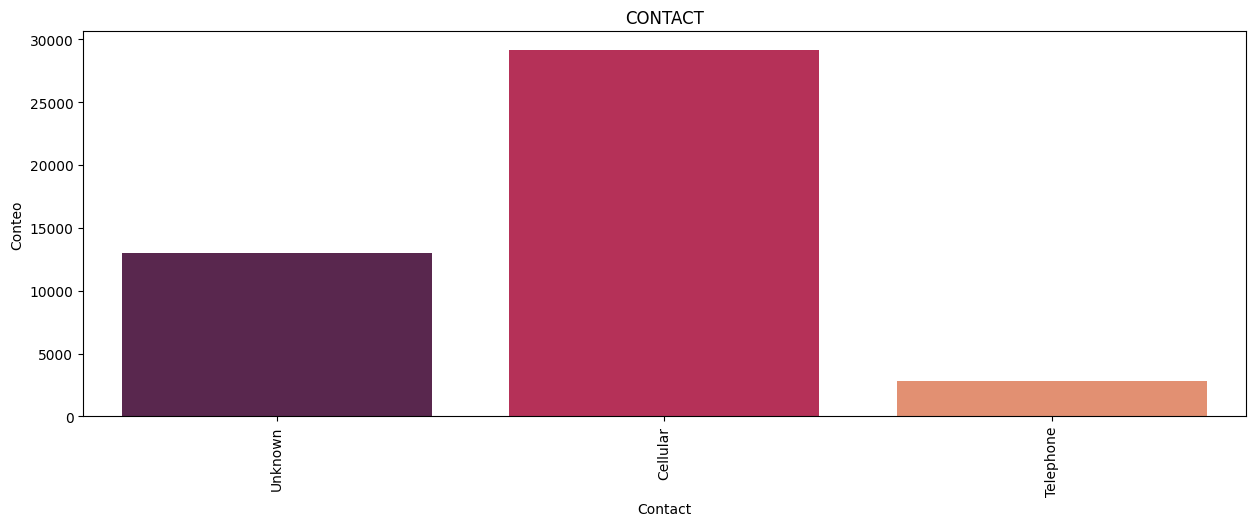

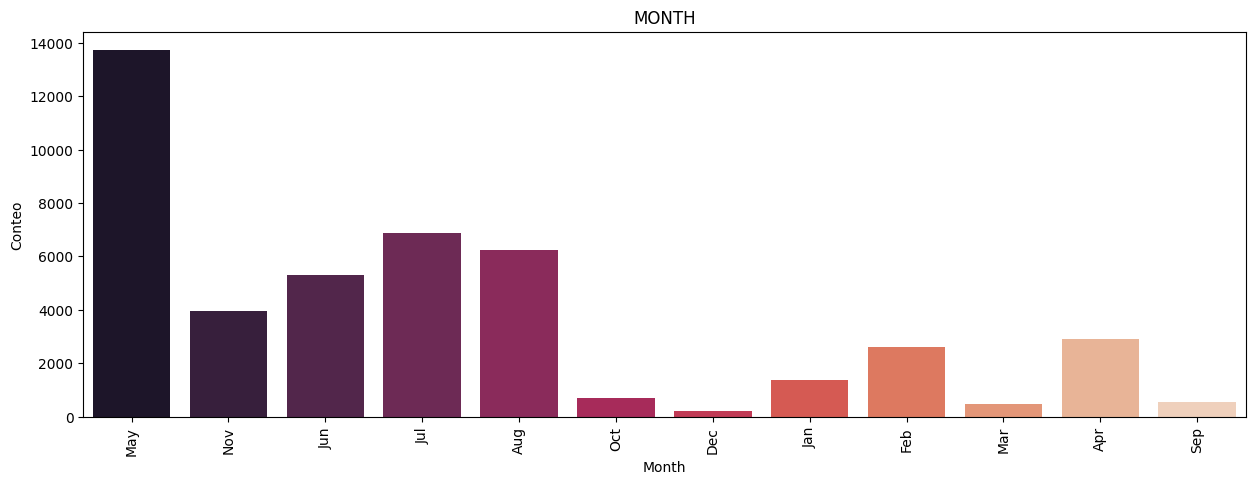

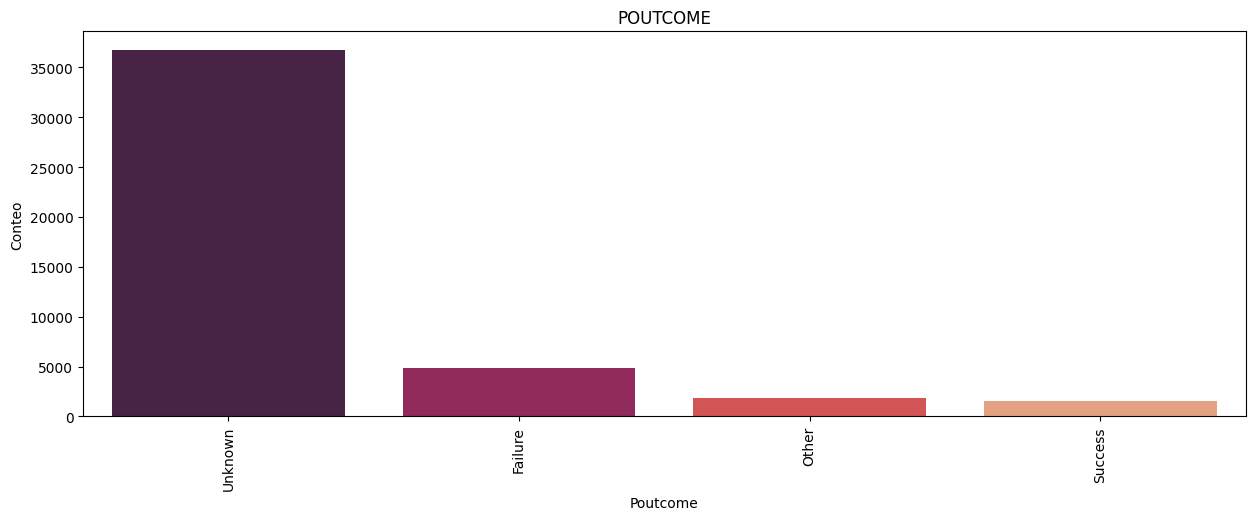

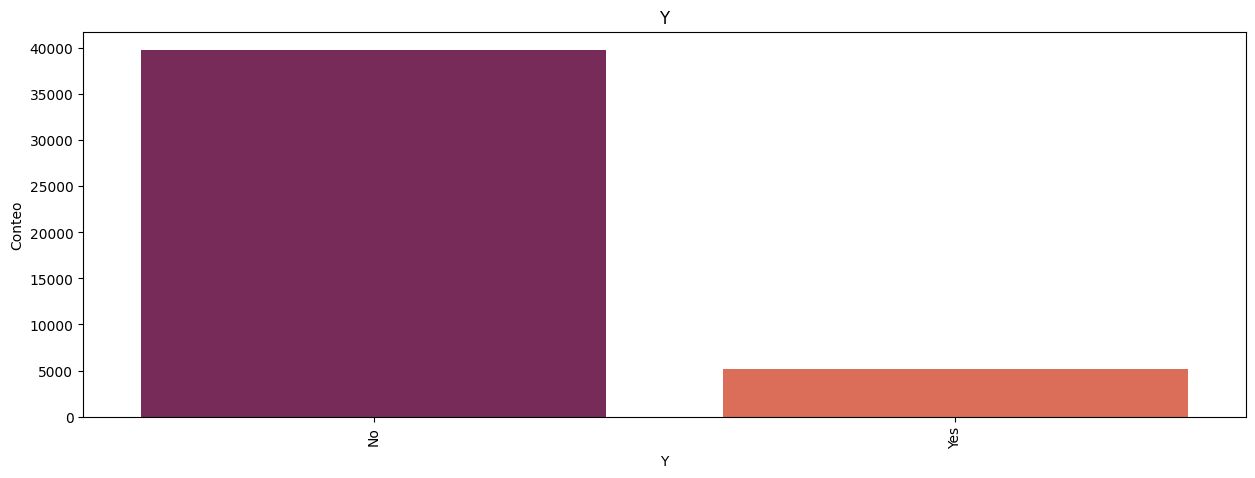

In [6]:
# Variables categ√≥ricas
for col in cols_categ:
  plt.figure(figsize=(15, 5))
  sns.countplot(x=col, data=df_bancos_clean, hue=col, palette='rocket')
  plt.title(col.upper())
  plt.xlabel(col.capitalize())
  plt.ylabel('Conteo')
  plt.xticks(rotation=90)
  plt.show()

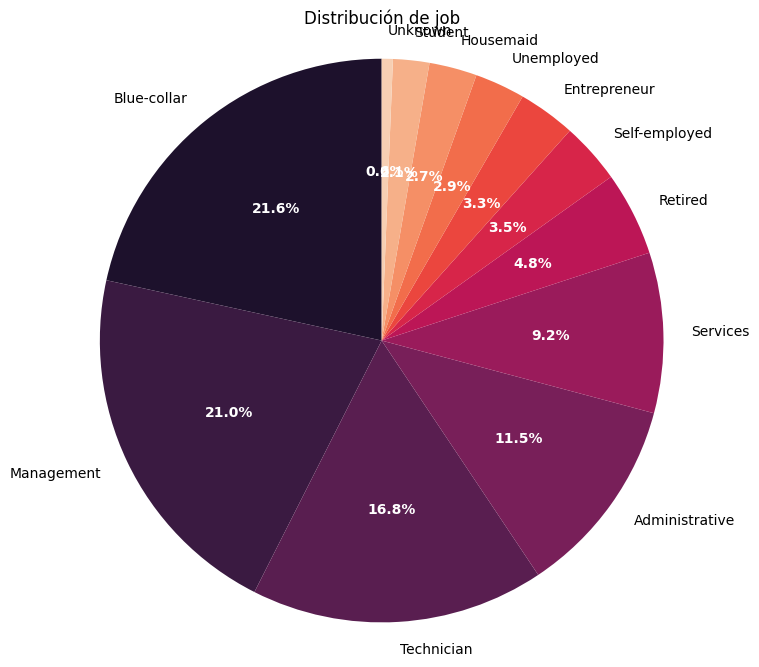

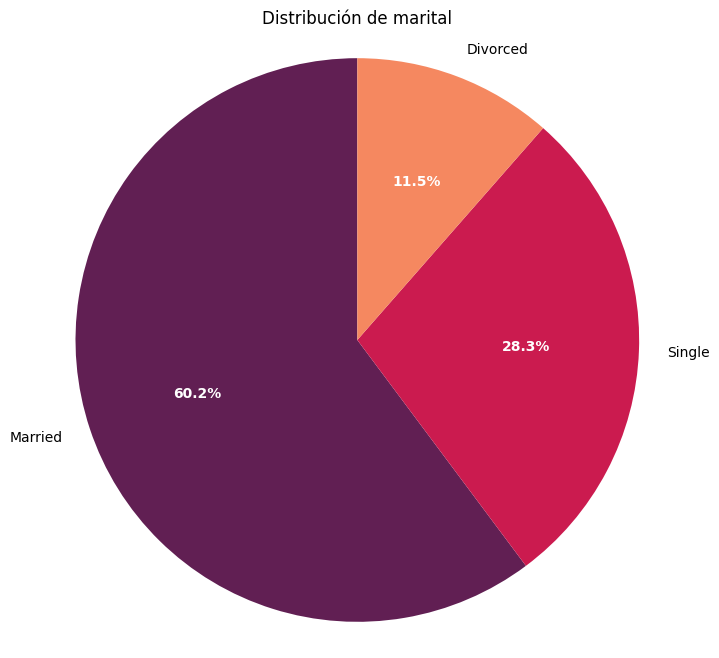

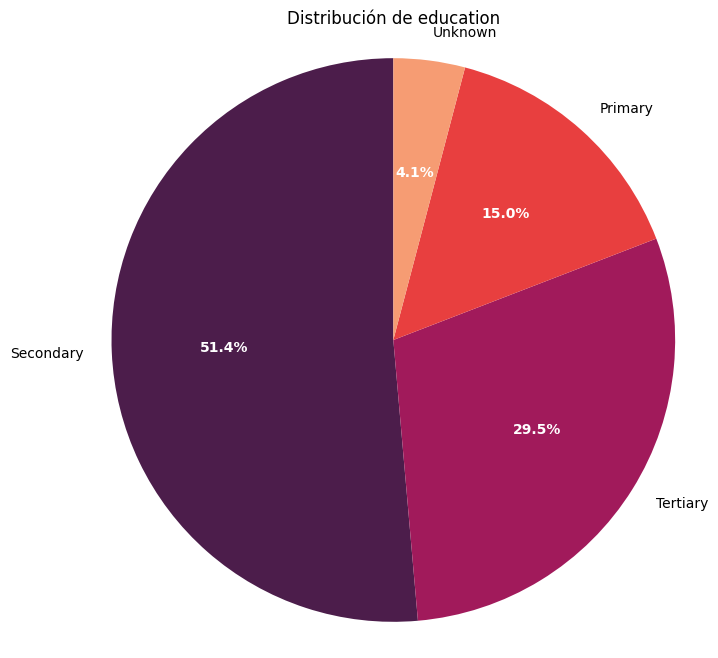

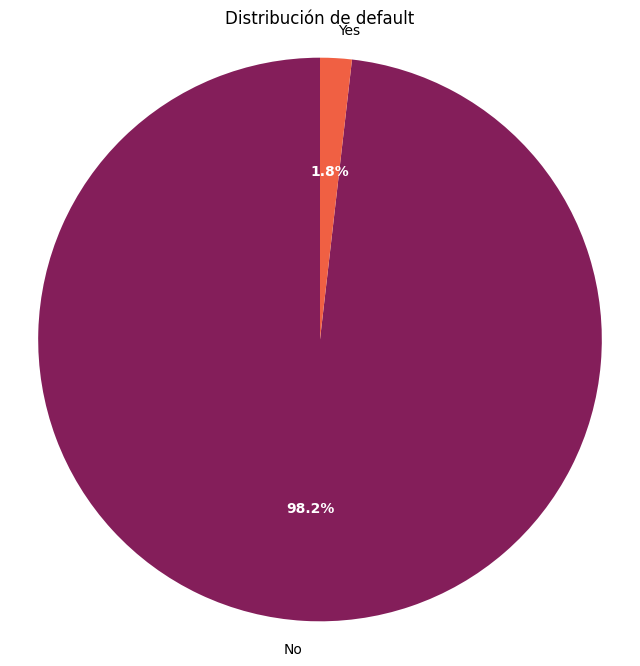

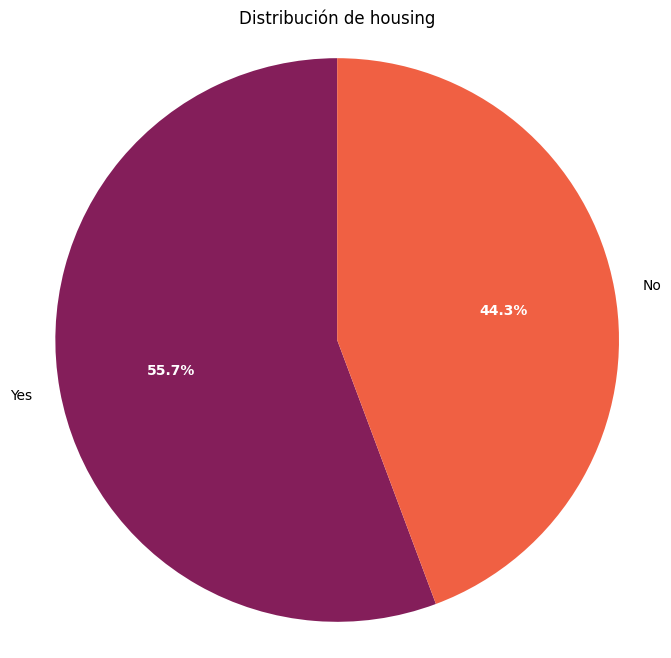

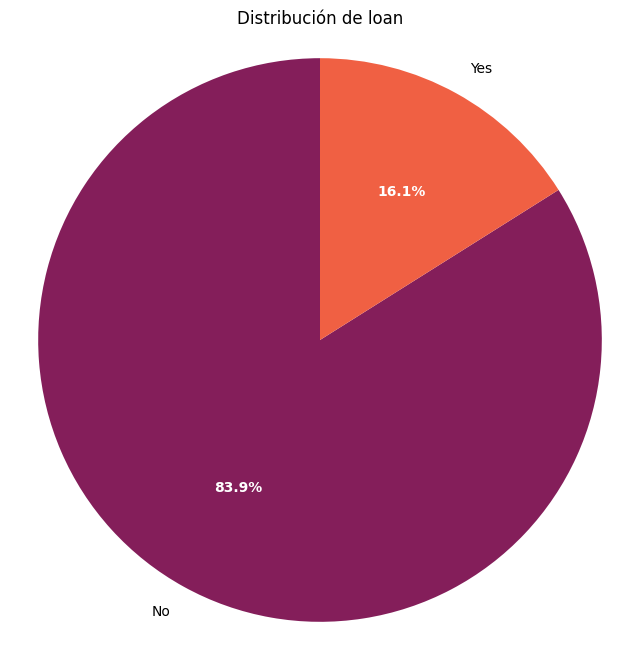

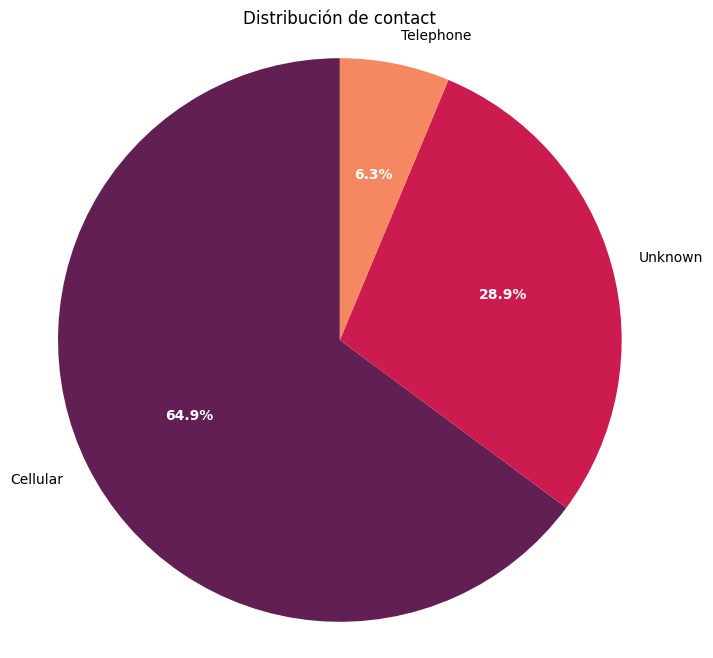

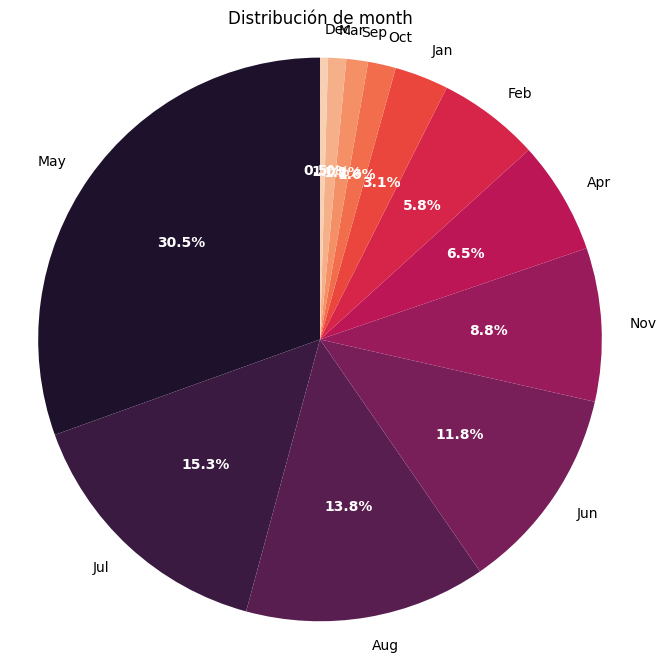

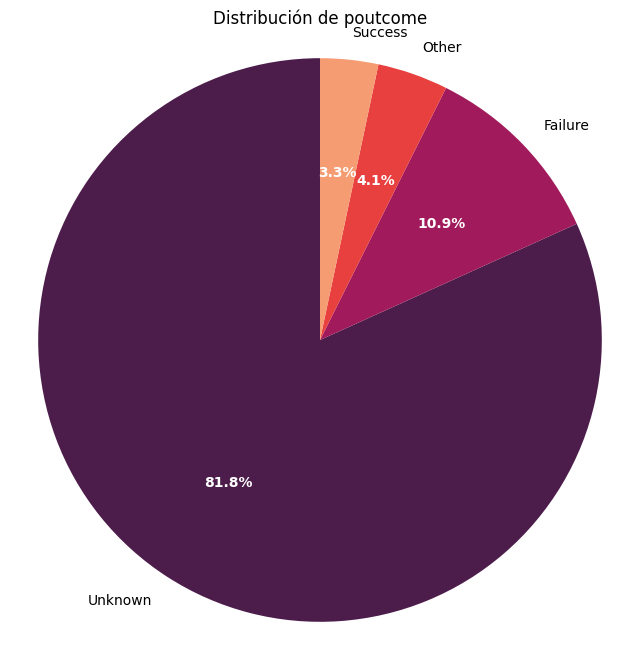

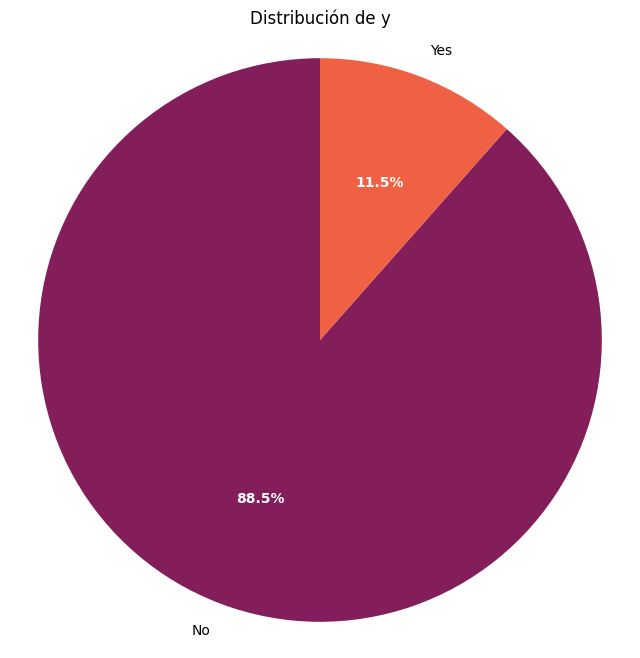

In [7]:
###
# Variables categ√≥ricas - Pie charts simples
###
for col in cols_categ:
    plt.figure(figsize=(8, 8))
    
    counts = df_bancos_clean[col].value_counts()
    colors = sns.color_palette('rocket', len(counts))
    
    # Gr√°fica de pie con texto blanco y sombra
    wedges, texts, autotexts = plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', 
                                      startangle=90, colors=colors)
    
    # Cambiar color de los porcentajes a blanco con sombra
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        # autotext.set_shadow(True)

    plt.title(f'Distribuci√≥n de {col}')
    plt.axis('equal')
    
    plt.show()

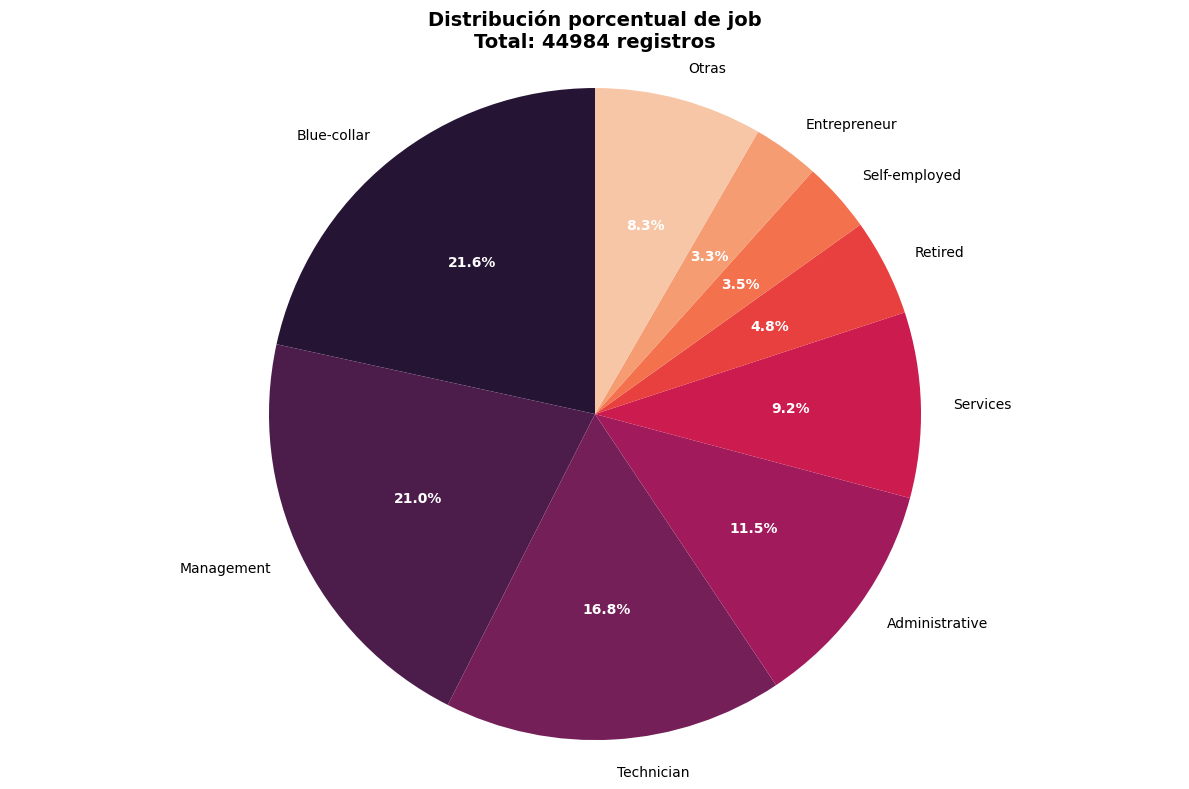


üìä Resumen estad√≠stico - job:
     Categor√≠a  Conteo  Porcentaje (%)
   Blue-collar    9701            21.6
    Management    9437            21.0
    Technician    7571            16.8
Administrative    5162            11.5
      Services    4137             9.2
       Retired    2168             4.8
 Self-employed    1574             3.5
  Entrepreneur    1483             3.3
         Otras    3751             8.3
--------------------------------------------------


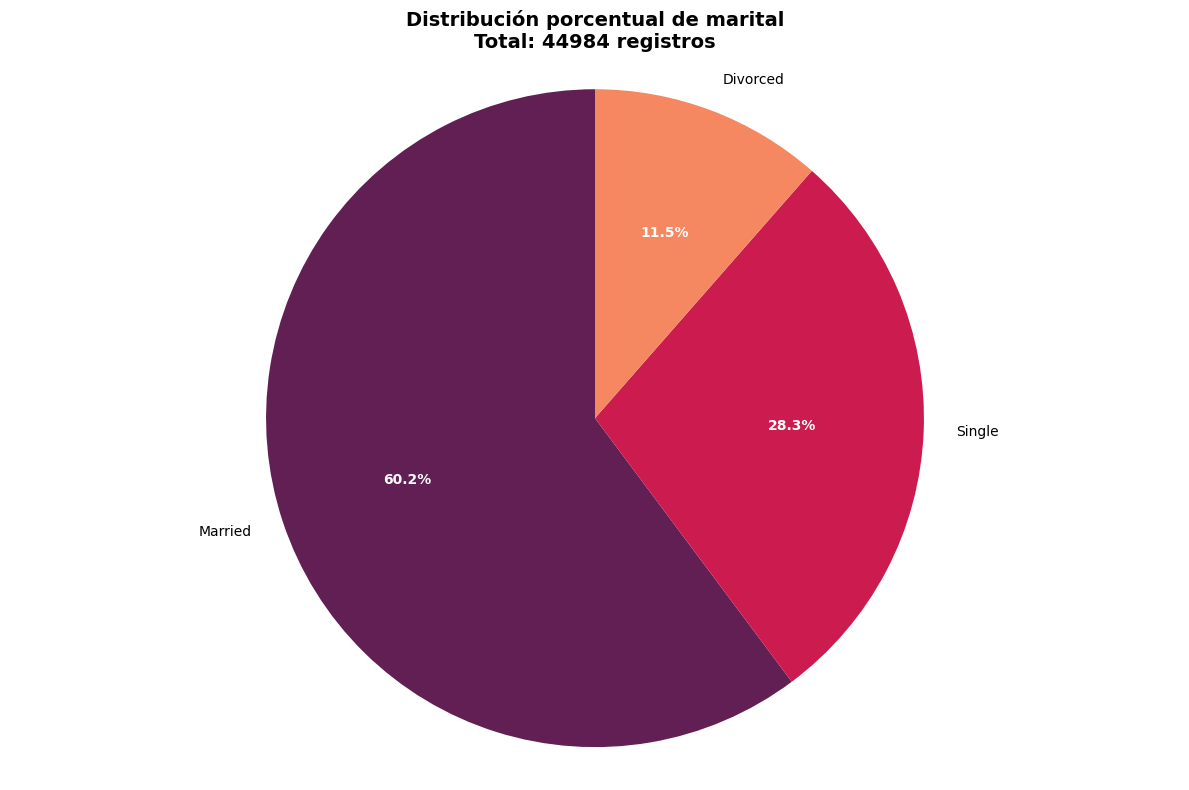


üìä Resumen estad√≠stico - marital:
Categor√≠a  Conteo  Porcentaje (%)
  Married   27083            60.2
   Single   12747            28.3
 Divorced    5154            11.5
--------------------------------------------------


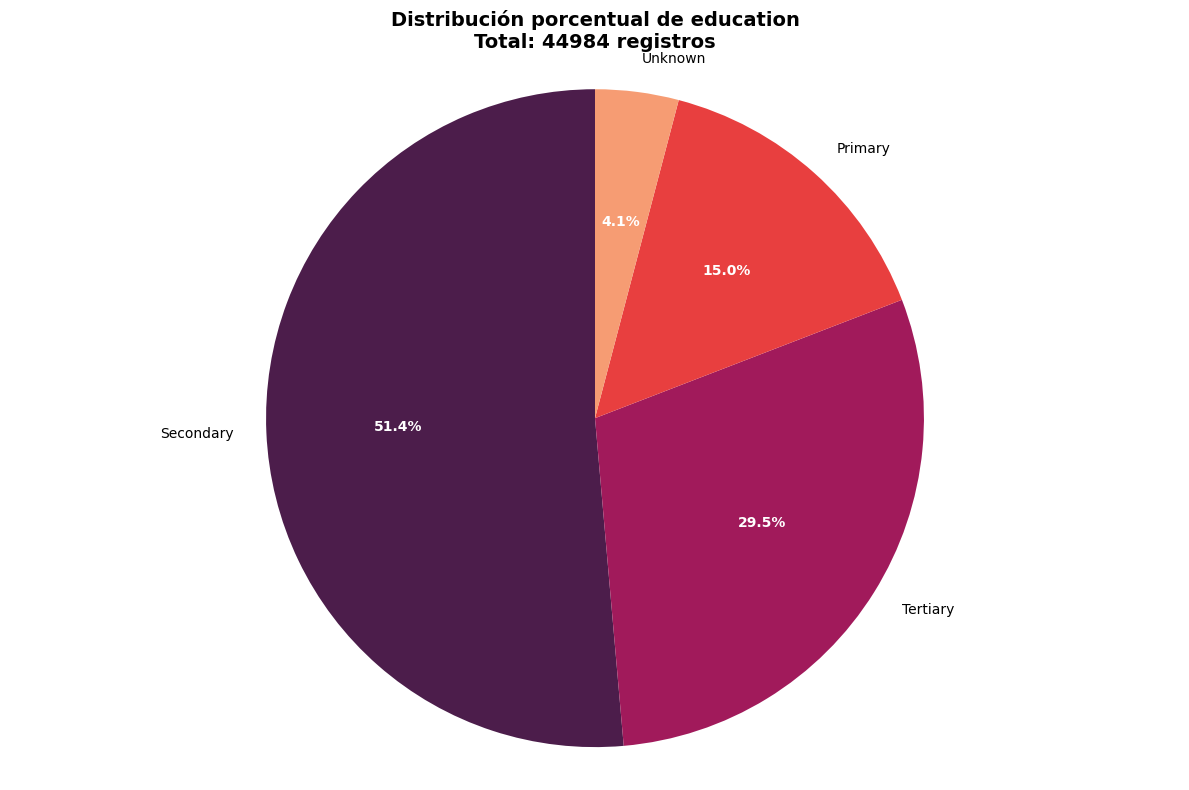


üìä Resumen estad√≠stico - education:
Categor√≠a  Conteo  Porcentaje (%)
Secondary   23118            51.4
 Tertiary   13255            29.5
  Primary    6768            15.0
  Unknown    1843             4.1
--------------------------------------------------


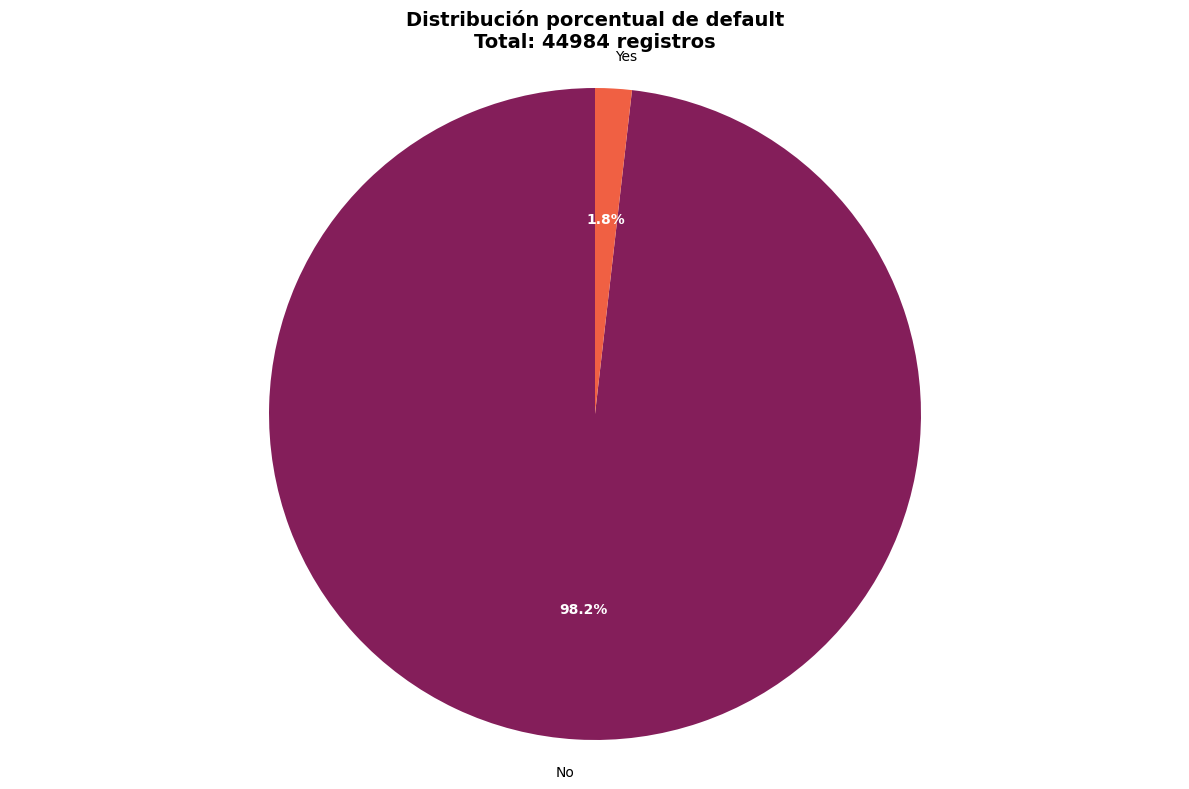


üìä Resumen estad√≠stico - default:
Categor√≠a  Conteo  Porcentaje (%)
       No   44169            98.2
      Yes     815             1.8
--------------------------------------------------


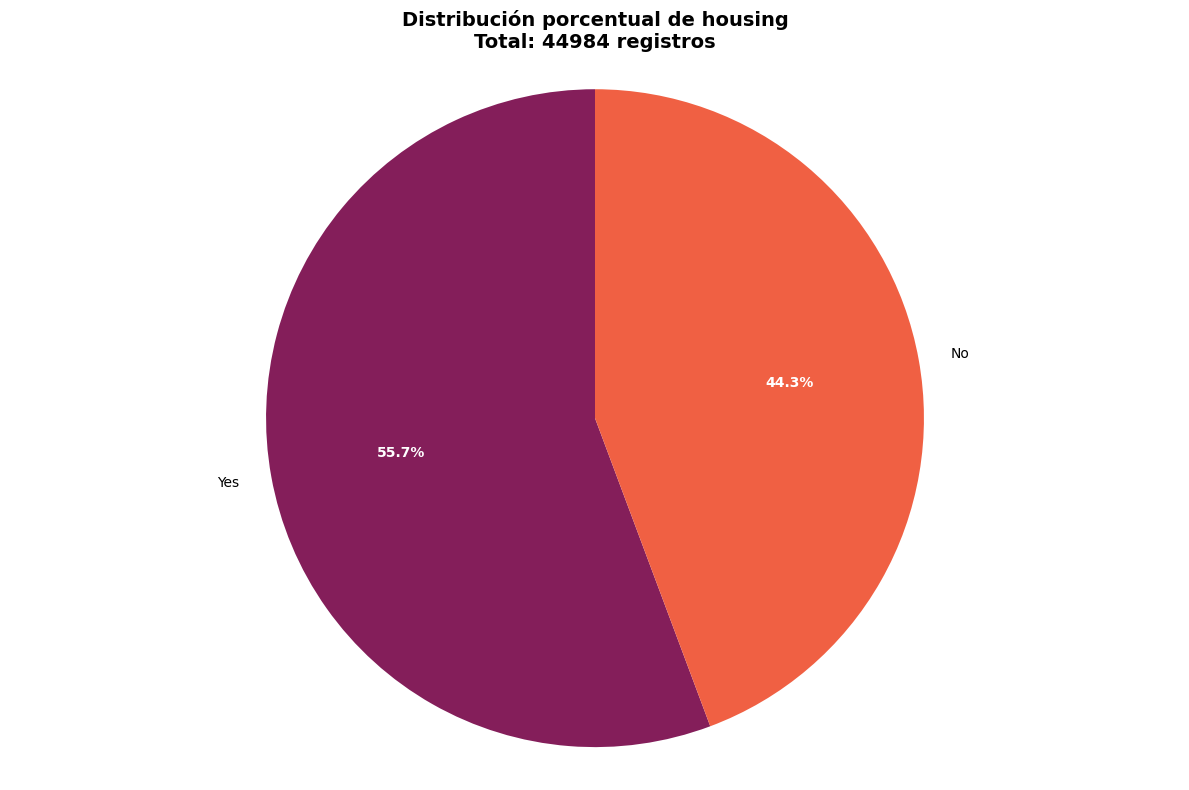


üìä Resumen estad√≠stico - housing:
Categor√≠a  Conteo  Porcentaje (%)
      Yes   25055            55.7
       No   19929            44.3
--------------------------------------------------


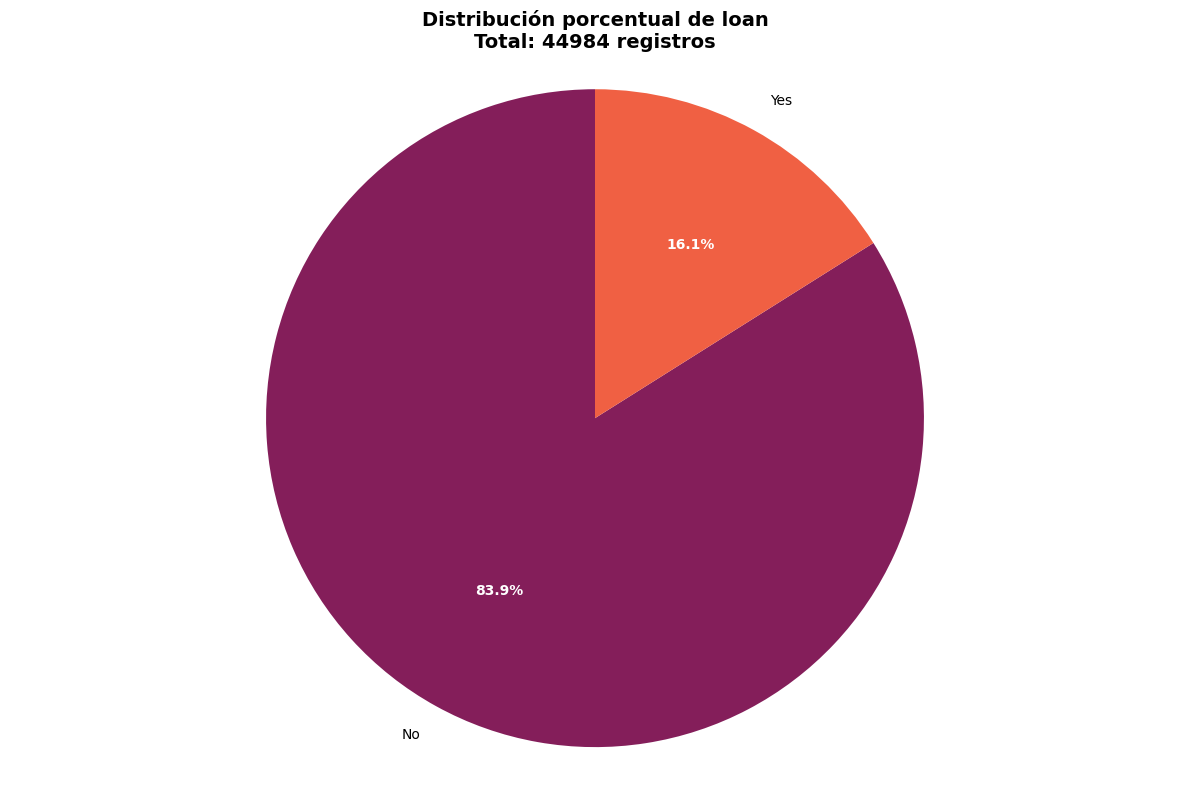


üìä Resumen estad√≠stico - loan:
Categor√≠a  Conteo  Porcentaje (%)
       No   37759            83.9
      Yes    7225            16.1
--------------------------------------------------


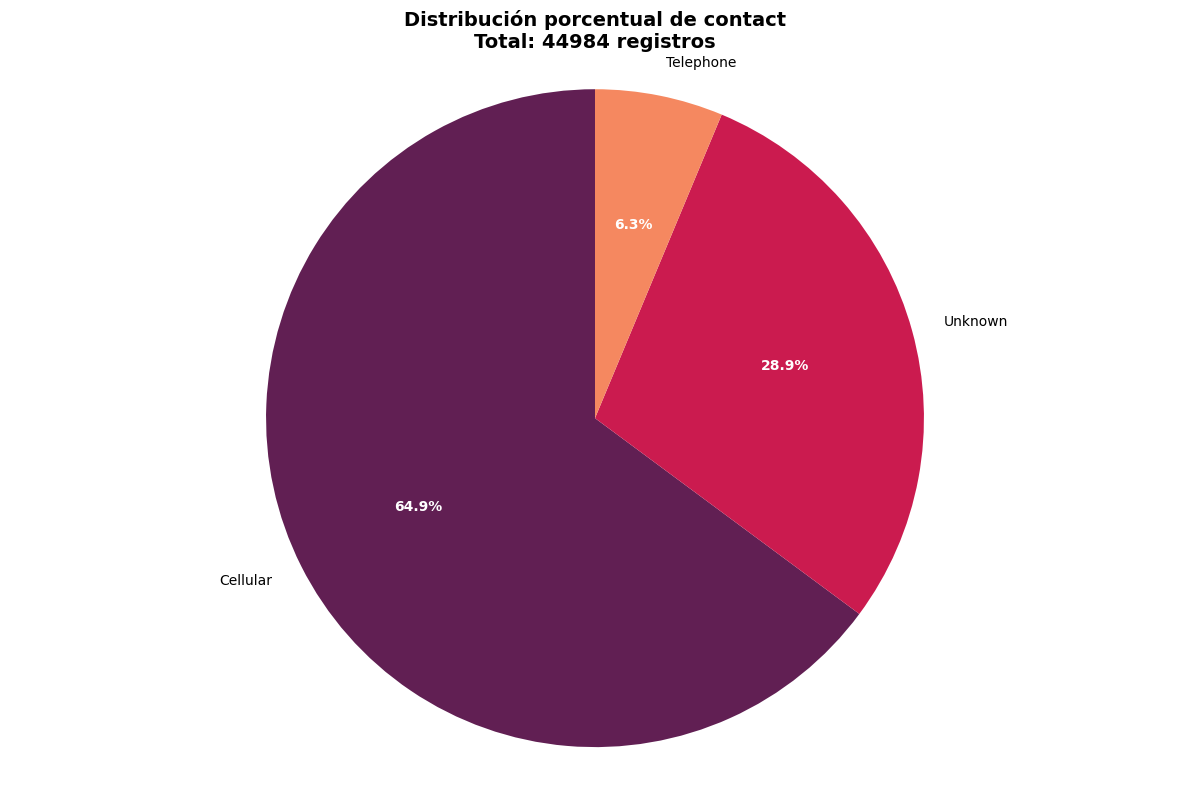


üìä Resumen estad√≠stico - contact:
Categor√≠a  Conteo  Porcentaje (%)
 Cellular   29174            64.9
  Unknown   12979            28.9
Telephone    2831             6.3
--------------------------------------------------


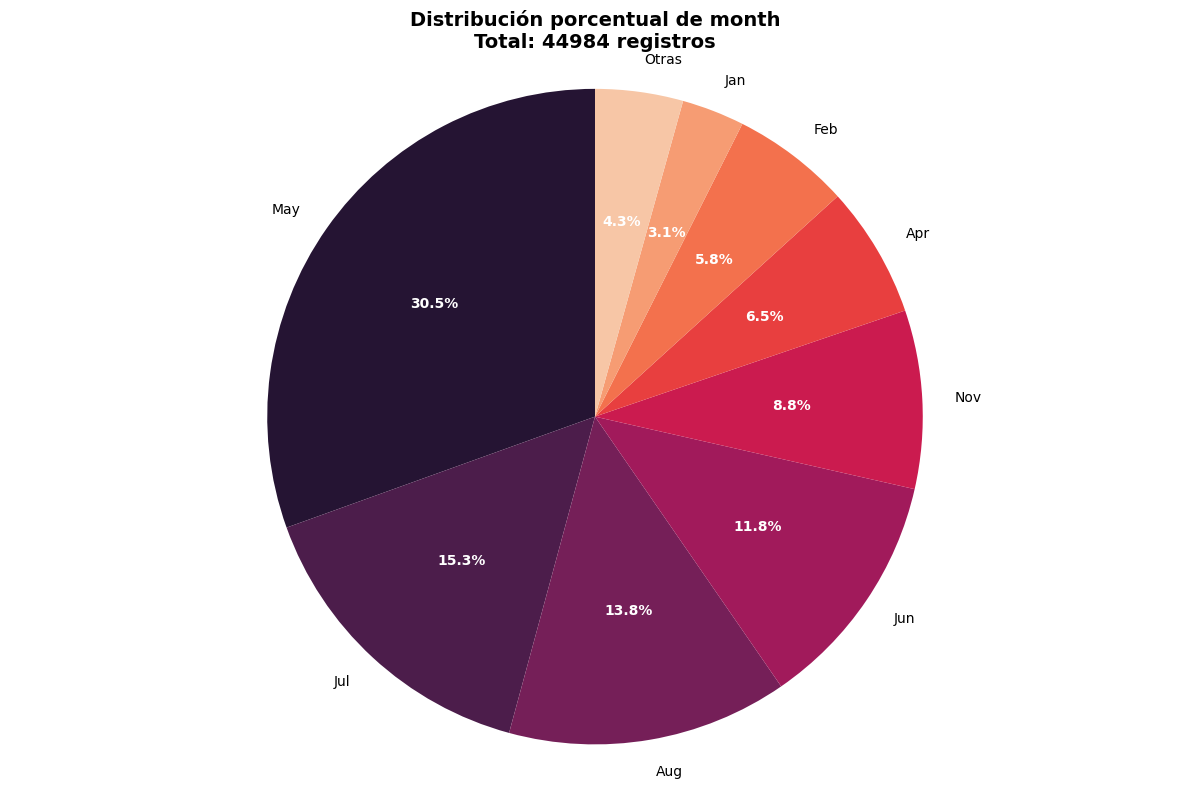


üìä Resumen estad√≠stico - month:
Categor√≠a  Conteo  Porcentaje (%)
      May   13719            30.5
      Jul    6874            15.3
      Aug    6224            13.8
      Jun    5324            11.8
      Nov    3957             8.8
      Apr    2918             6.5
      Feb    2629             5.8
      Jan    1390             3.1
    Otras    1949             4.3
--------------------------------------------------


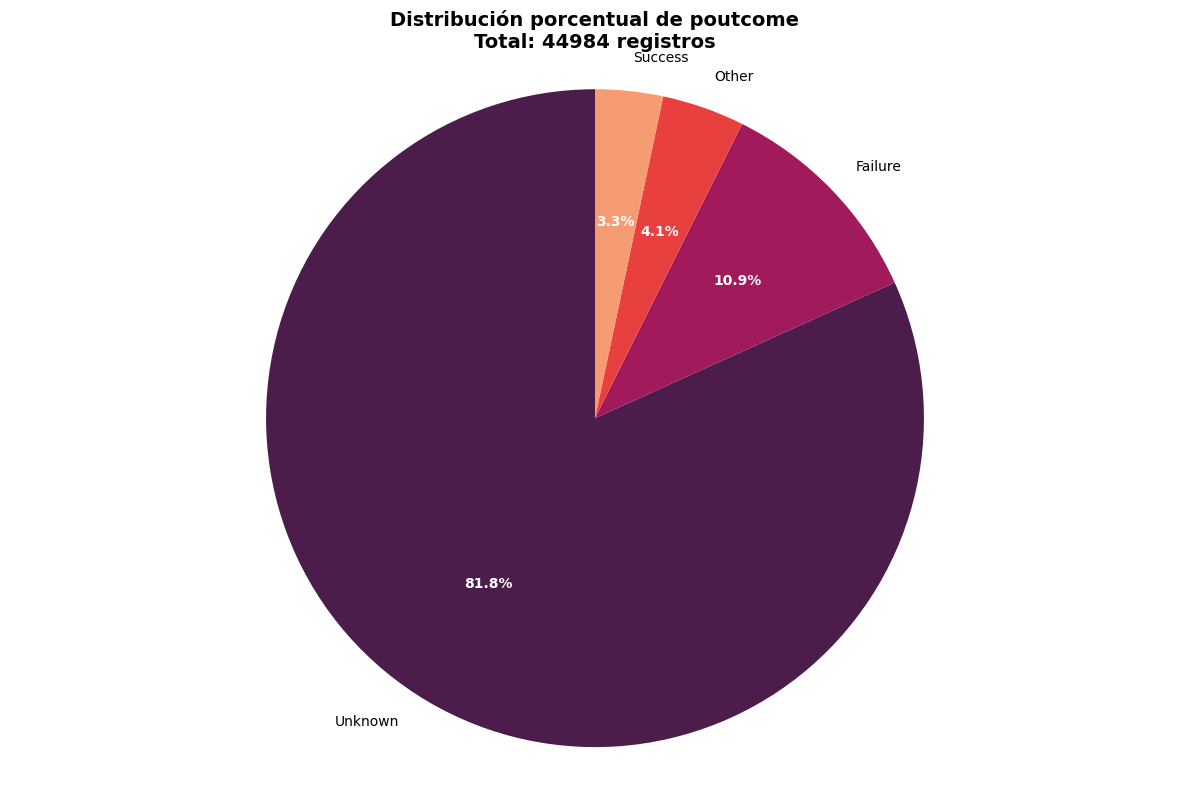


üìä Resumen estad√≠stico - poutcome:
Categor√≠a  Conteo  Porcentaje (%)
  Unknown   36781            81.8
  Failure    4883            10.9
    Other    1823             4.1
  Success    1497             3.3
--------------------------------------------------


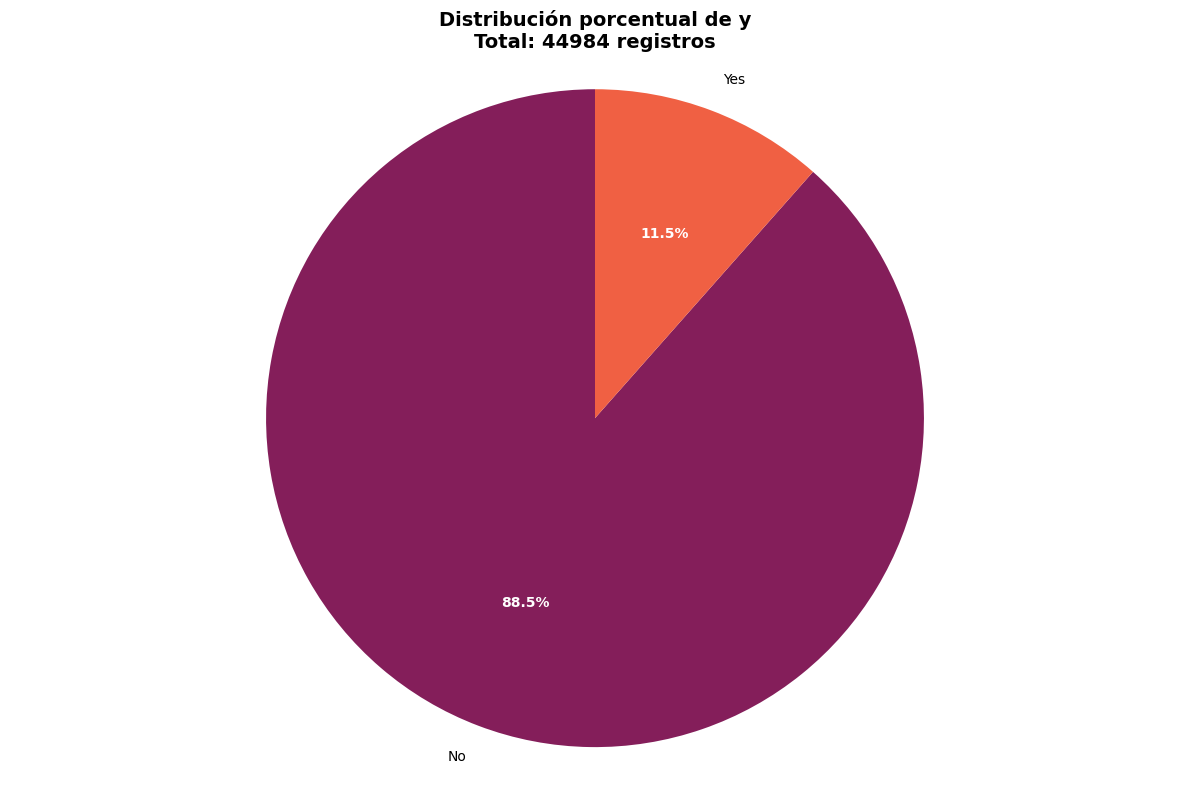


üìä Resumen estad√≠stico - y:
Categor√≠a  Conteo  Porcentaje (%)
       No   39797            88.5
      Yes    5187            11.5
--------------------------------------------------


In [8]:
###
# Variables categ√≥ricas - Gr√°ficas de pie mejoradas
###
for col in cols_categ:
    plt.figure(figsize=(12, 8))
    
    # Calcular estad√≠sticas
    counts = df_bancos_clean[col].value_counts()
    total = counts.sum()
    percentages = (counts / total * 100).round(1)
    
    # Filtrar categor√≠as muy peque√±as para mejor visualizaci√≥n
    if len(counts) > 10:
        # Si hay muchas categor√≠as, mostrar solo las top 8 y agrupar el resto
        top_counts = counts.head(8)
        other_count = counts[8:].sum()
        counts = pd.concat([top_counts, pd.Series([other_count], index=['Otras'])])
        percentages = (counts / total * 100).round(1)
    
    # Crear gr√°fica de pie
    wedges, texts, autotexts = plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', 
                                      startangle=90, colors=sns.color_palette('rocket', len(counts)),
                                      textprops={'fontsize': 10})
    
    # Mejorar los textos de porcentaje
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.title(f'Distribuci√≥n porcentual de {col}\nTotal: {total} registros', fontsize=14, fontweight='bold')
    plt.axis('equal')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar tabla resumen
    print(f'\nüìä Resumen estad√≠stico - {col}:')
    summary_df = pd.DataFrame({
        'Categor√≠a': counts.index,
        'Conteo': counts.values,
        'Porcentaje (%)': percentages
    })
    print(summary_df.to_string(index=False))
    print('-' * 50)

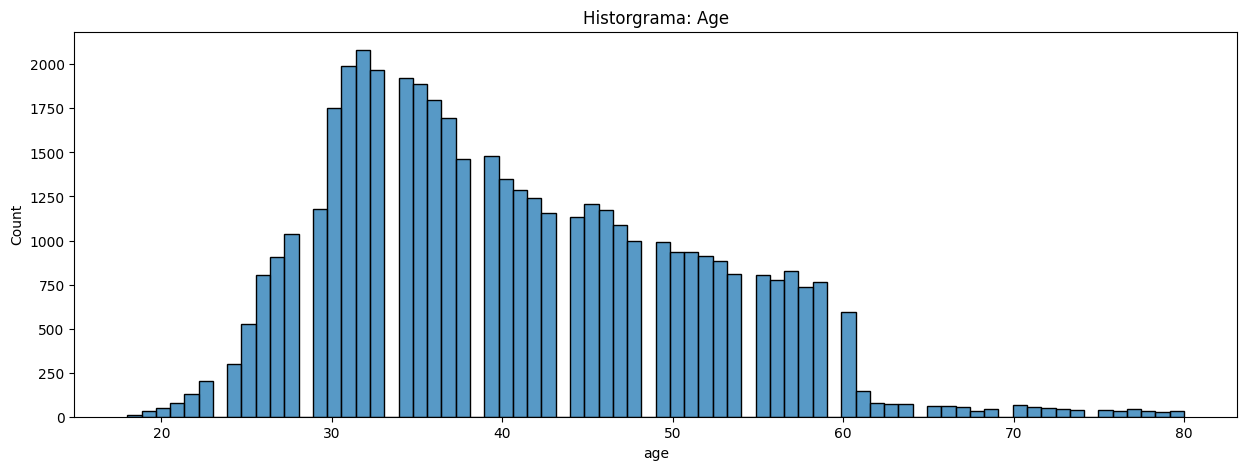

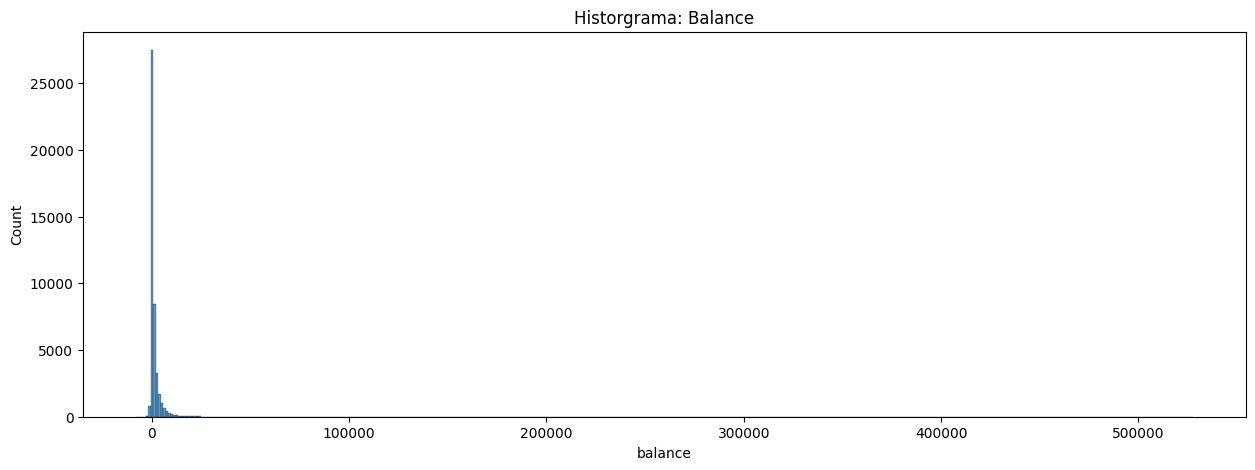

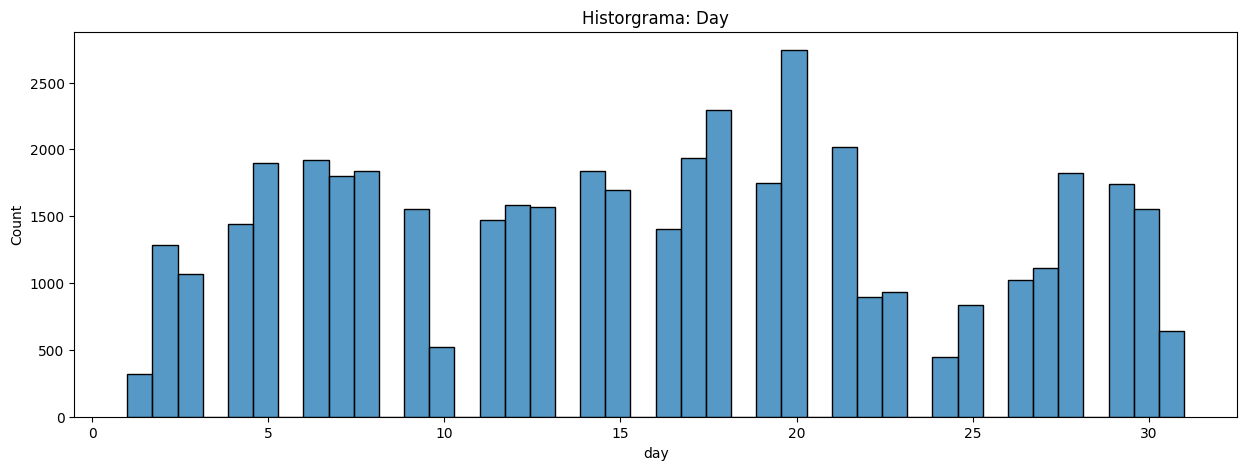

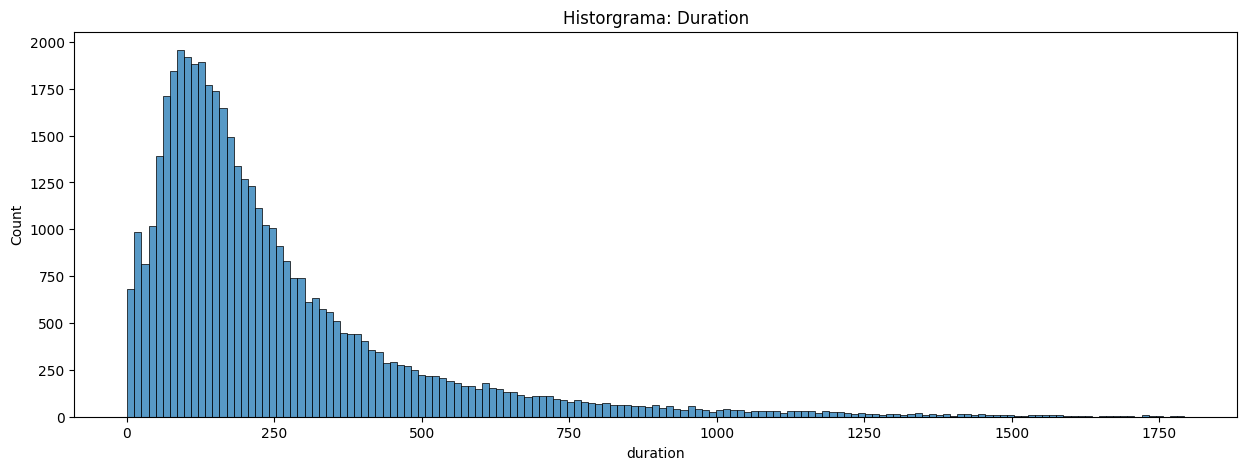

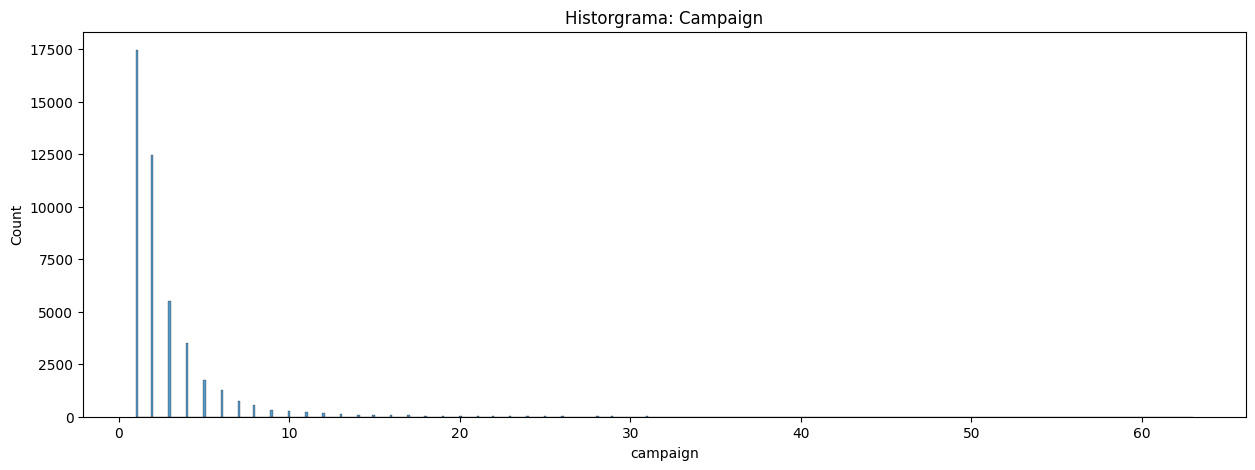

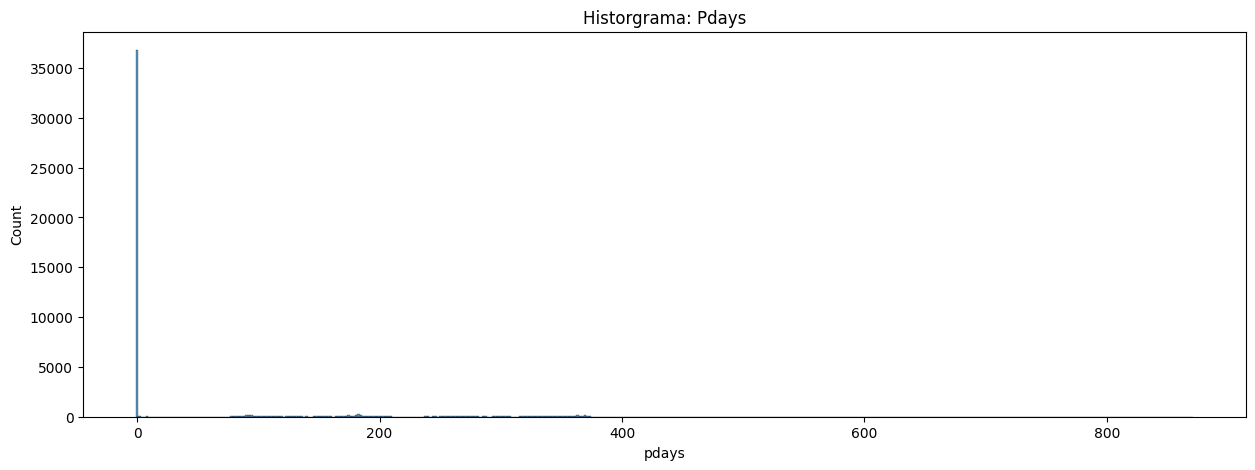

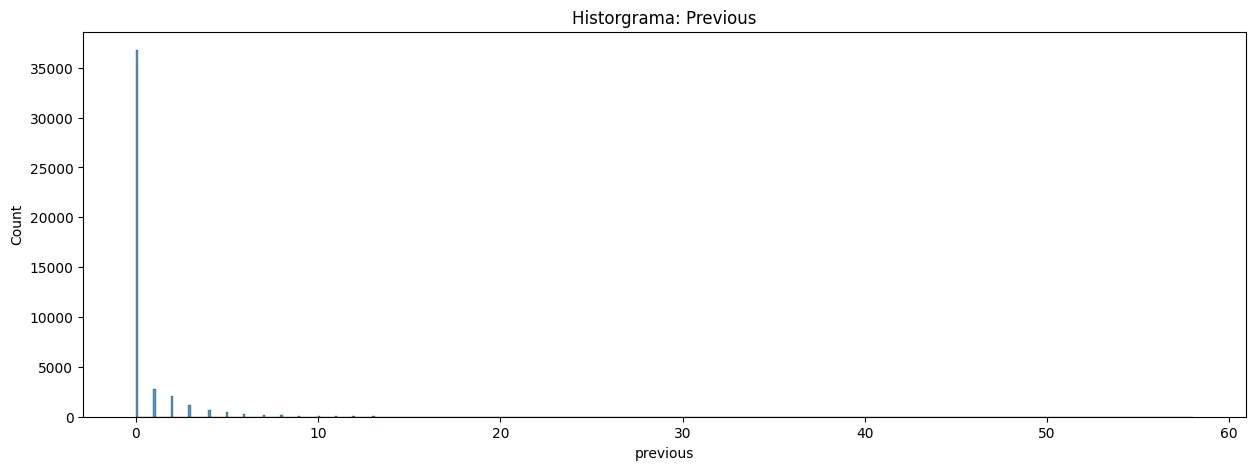

In [9]:
###
# Variables Num√©ricas
###
for col in cols_num:
  plt.figure(figsize=(15, 5))
  sns.histplot(x=col, data=df_bancos_clean)
  plt.title(f'Historgrama: {col.capitalize()}')
  plt.show()

In [10]:
###
# Eliminar
###
columns_drop =['month', 'day', 'duration', 'campaign', 'contact', 'pdays', 'previous']
df_bancos_clean.drop(columns=columns_drop, inplace=True)

In [11]:
df_bancos_clean.shape

(44984, 10)

# 4.1 An√°lisis Univariado

In [12]:
###
# Columnas: Categ√≥ricas y num√©ricas
###
columnas = list(df_bancos_clean.keys())
cols_categ = [x for x in columnas if df_bancos_clean[x].dtype == 'object']
cols_num = [x for x in columnas if df_bancos_clean[x].dtype != 'object']

In [13]:
###
# Cuantificar la salida
###
dic_salida = {'Yes': 1, 'No': 0}
df_bancos_clean['y_bin'] = df_bancos_clean['y'].map(dic_salida)

In [14]:
df_bancos_clean.sample(10)

age             job  marital  education default  balance housing loan  \
13766   45  Administrative   Single  Secondary      No    205.0      No  Yes   
15406   60         Retired  Married    Primary      No    949.0      No  Yes   
12432   49       Housemaid  Married    Primary      No    935.0      No  Yes   
22383   35      Technician   Single   Tertiary      No    296.0      No   No   
35132   28        Services   Single  Secondary      No   6332.0     Yes   No   
39349   30      Technician   Single  Secondary      No    156.0     Yes   No   
9520    38       Housemaid  Married    Primary      No   3577.0      No   No   
43550   46      Management   Single  Secondary      No   5993.0      No   No   
29791   52     Blue-collar  Married  Secondary      No   2338.0     Yes   No   
33028   57  Administrative  Married    Primary      No    202.0     Yes   No   

      poutcome   y  y_bin  
13766  Unknown  No      0  
15406  Unknown  No      0  
12432  Unknown  No      0  
22383  Unknown  No      0  
35132  Failure  No      0  
39349  Failure  No      0  
9520   Unknown  No      0  
43550  Failure  No      0  
29791  Unknown  No      0  
33028  Failure  No      0

# Relaci√≥n con la variable Categ√≥rica

In [15]:
def grafica_barras(var_entr, orden=None):
  grupo = df_bancos_clean.groupby(var_entr)['y_bin'].mean().mul(100).rename('Taza_conver').reset_index()
  plt.figure(figsize=(15, 5))
  sns.barplot(x=var_entr, y= 'Taza_conver',data=grupo, hue=var_entr, palette='rocket', order=orden)
  plt.title(var_entr.upper())
  plt.xticks(rotation=60)
  plt.grid()
  plt.show()

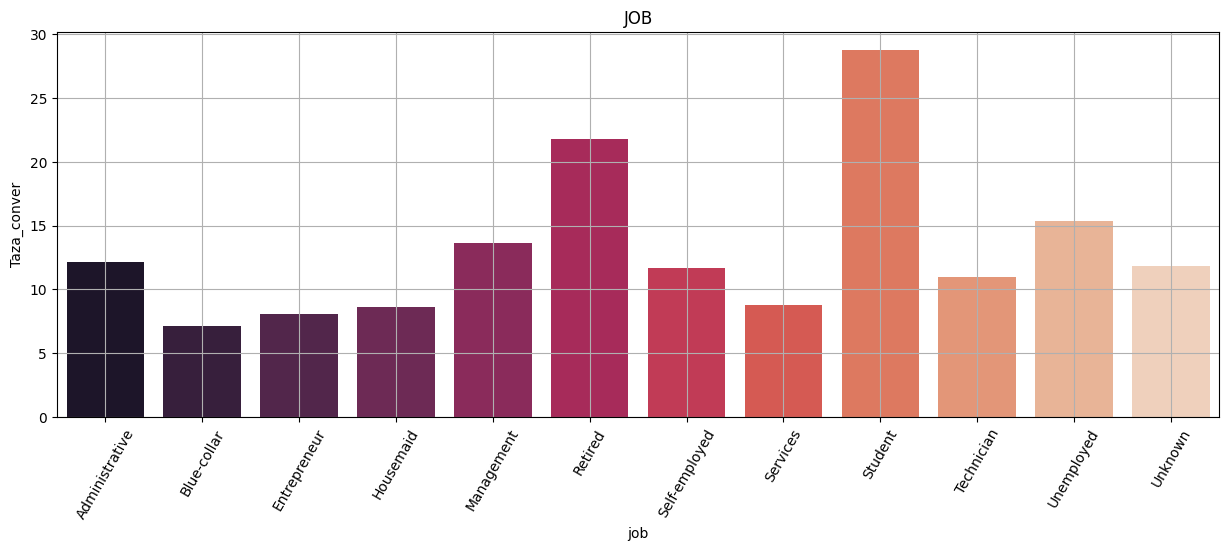

In [16]:
###
# Job se identifica una diferenciador entra los que que tuvieron un si (1) en la salida de la campa√±a osea adquirieron el producto
###
grafica_barras('job')

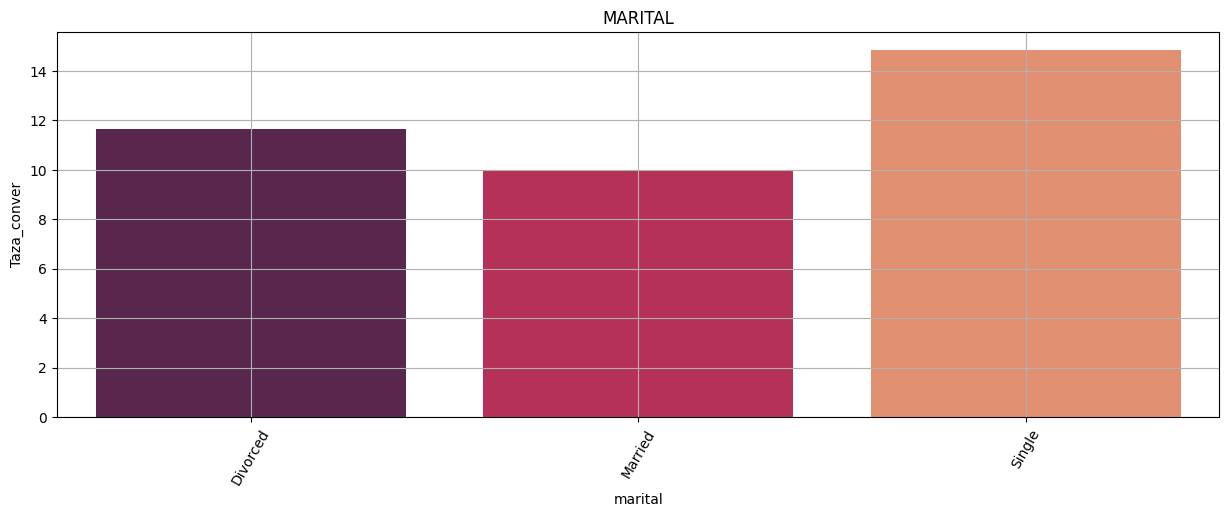

In [17]:
###
# Marital
###
grafica_barras('marital')

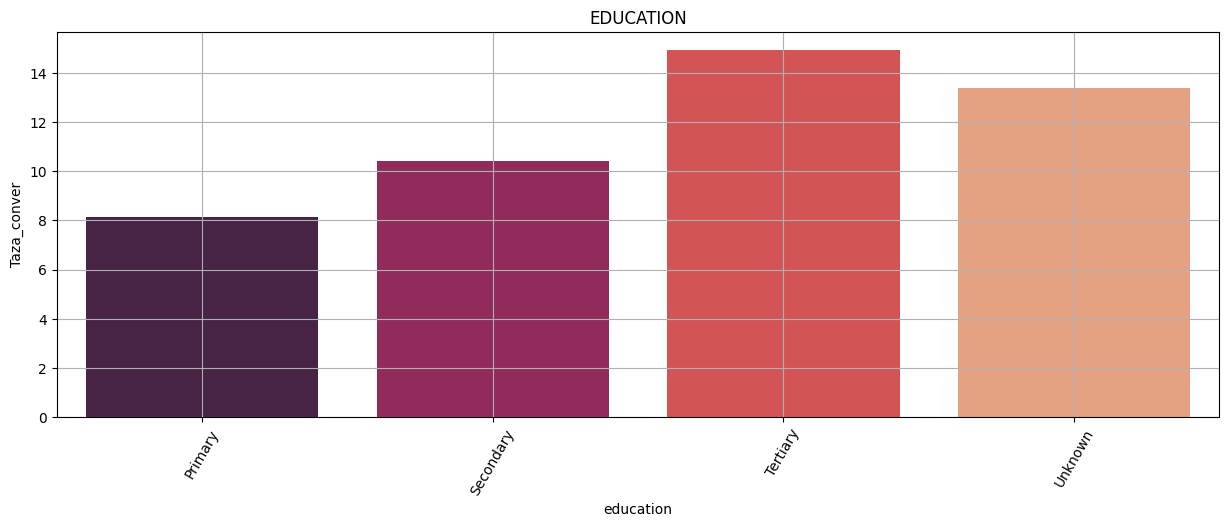

In [18]:
###
# Educaci√≥n
###
grafica_barras('education')

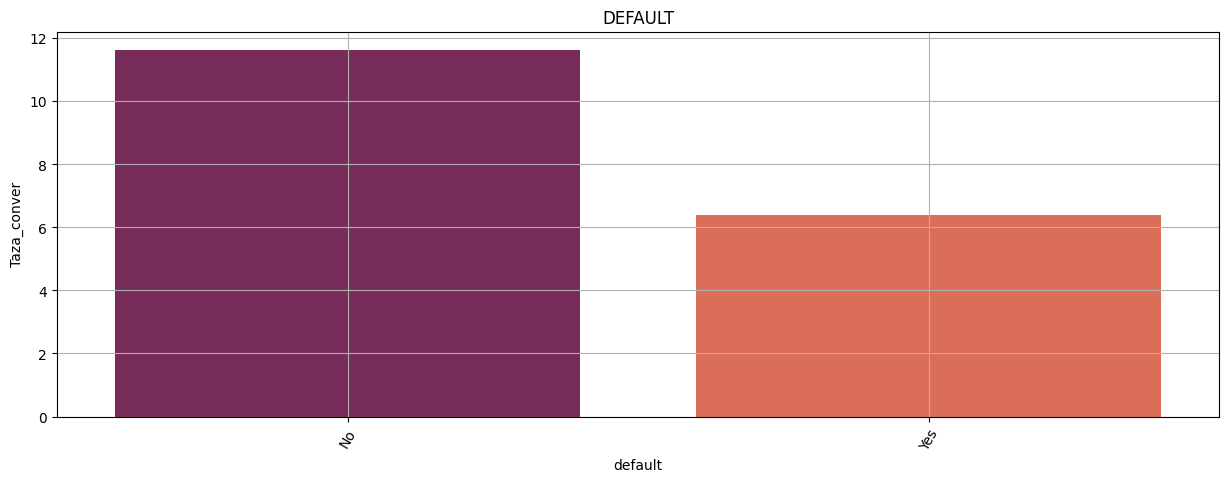

In [19]:
###
# Default
###
grafica_barras('default')

# Los que son cumplidos en pagar sus responsabilidades son propensos a adquirir 

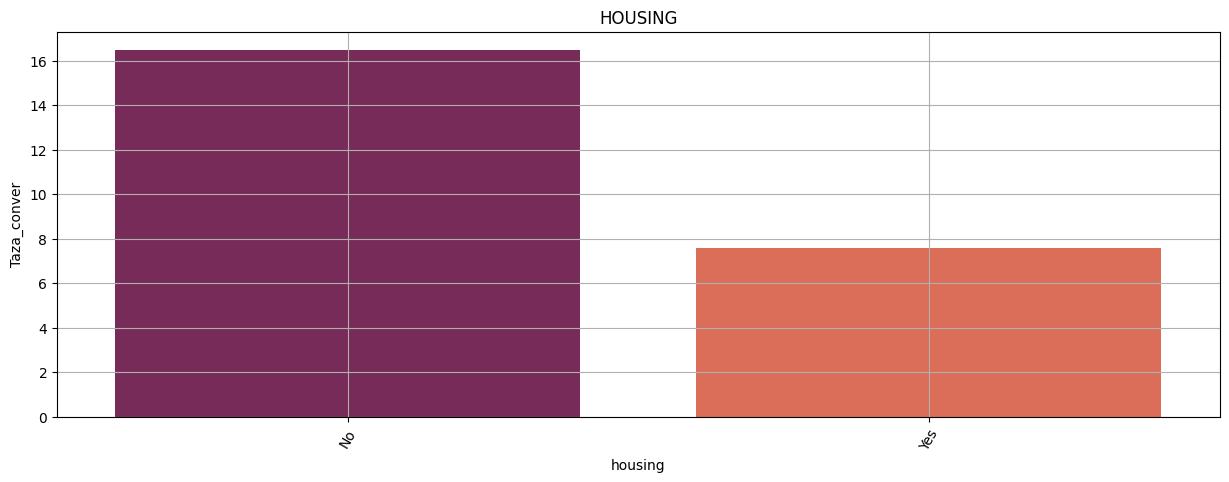

In [20]:
###
# Housing
###
grafica_barras('housing')

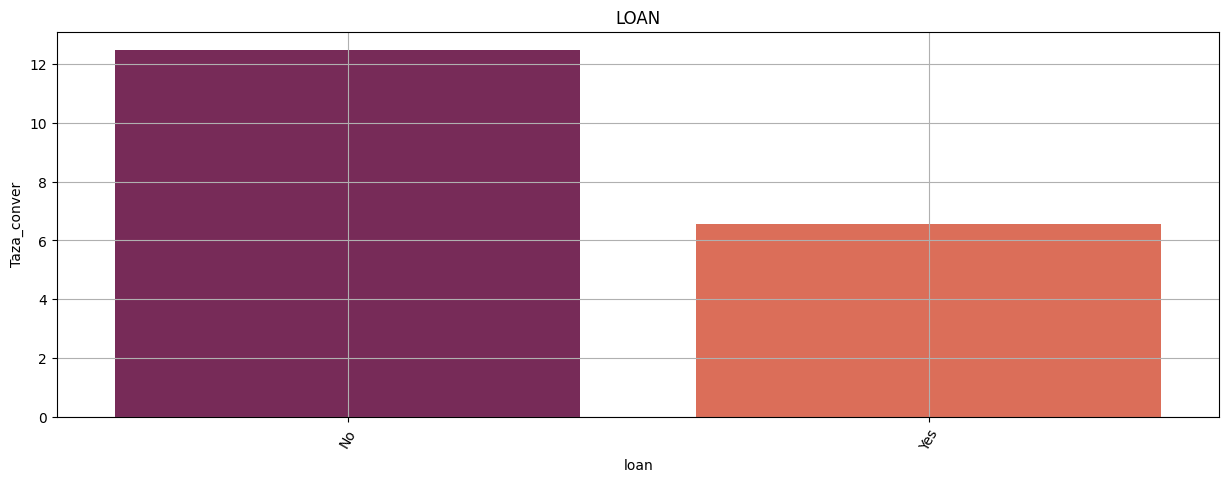

In [21]:
# Loan
grafica_barras('loan')

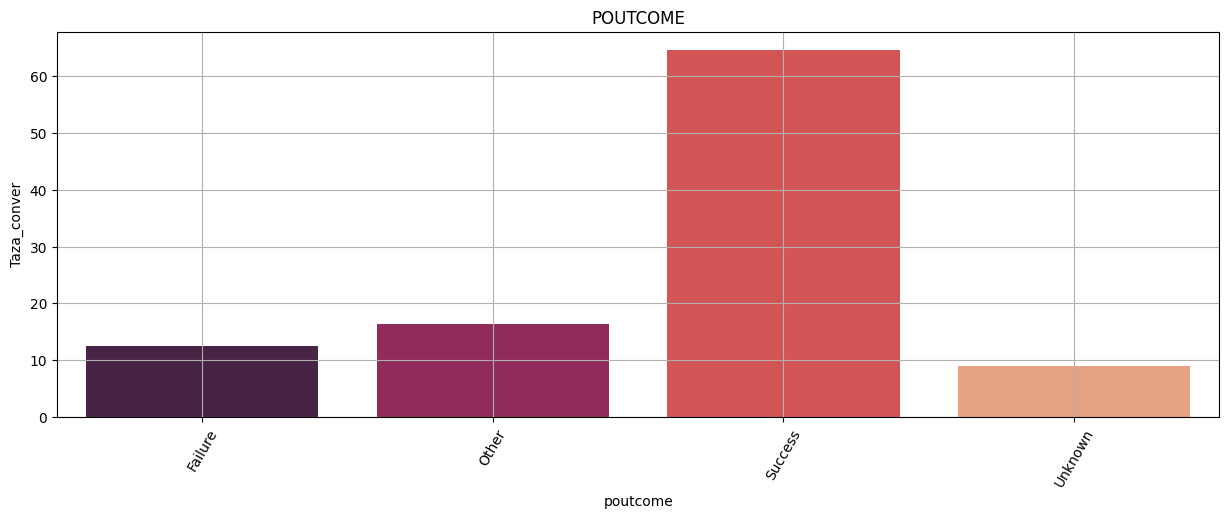

In [22]:
# Poutcome
grafica_barras('poutcome')

<function matplotlib.pyplot.show(close=None, block=None)>

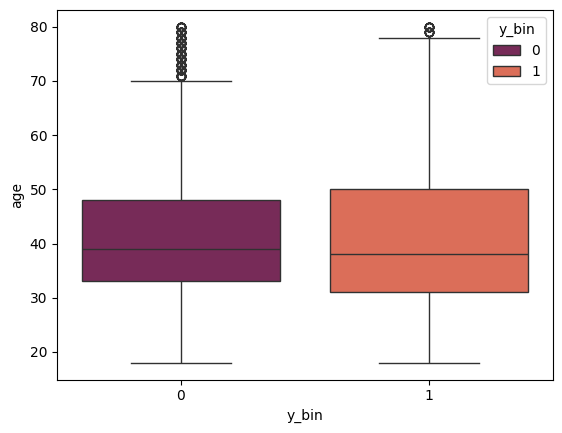

In [23]:
plt.Figure(figsize=(15,5))
sns.boxplot(x='y_bin', y = 'age', data=df_bancos_clean, hue='y_bin', palette='rocket')
plt.show

In [24]:
###
# Edad
###
df_bancos_clean.describe()

age        balance         y_bin
count  44984.000000   44984.000000  44984.000000
mean      40.837431    1370.053819      0.115308
std       10.432985    3894.389006      0.319396
min       18.000000   -8019.000000      0.000000
25%       33.000000      72.000000      0.000000
50%       39.000000     447.000000      0.000000
75%       48.000000    1425.000000      0.000000
max       80.000000  527532.000000      1.000000

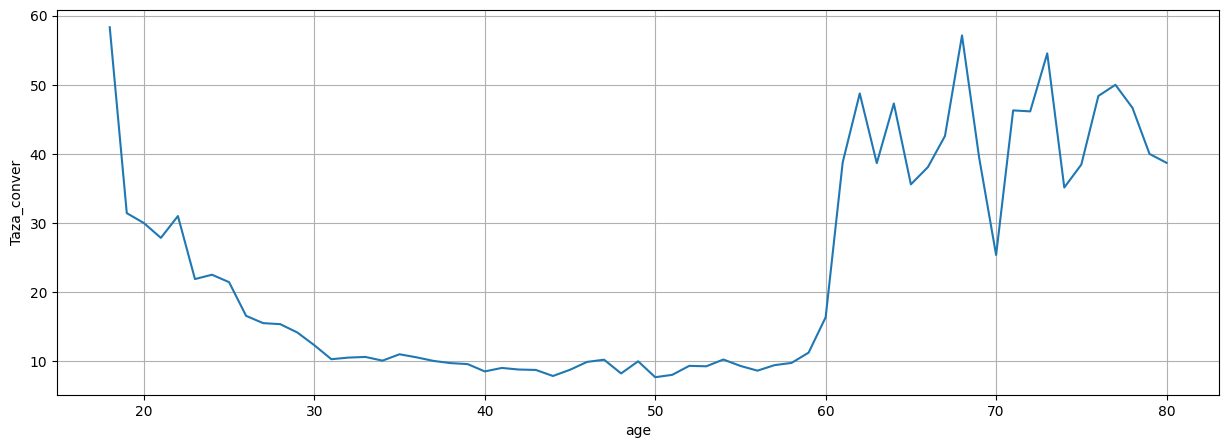

In [25]:
###
# Relaci√≥n edad  con salida a√±o tras a√±o
###
grupo = df_bancos_clean.groupby('age')['y_bin'].mean().mul(100).rename('Taza_conver').reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='age', y='Taza_conver', data=grupo)
plt.grid()
plt.show()

In [26]:
###
# Crear una colimna con subgrupo de edades
###
df_bancos_clean.loc[:, 'grupo_edades'] = '18-28'
df_bancos_clean.loc[(df_bancos_clean['age'] > 26) & (df_bancos_clean['age'] <= 60), 'grupo_edades'] = '27-60'
df_bancos_clean.loc[(df_bancos_clean['age'] > 60, 'grupo_edades')]  = '60+'

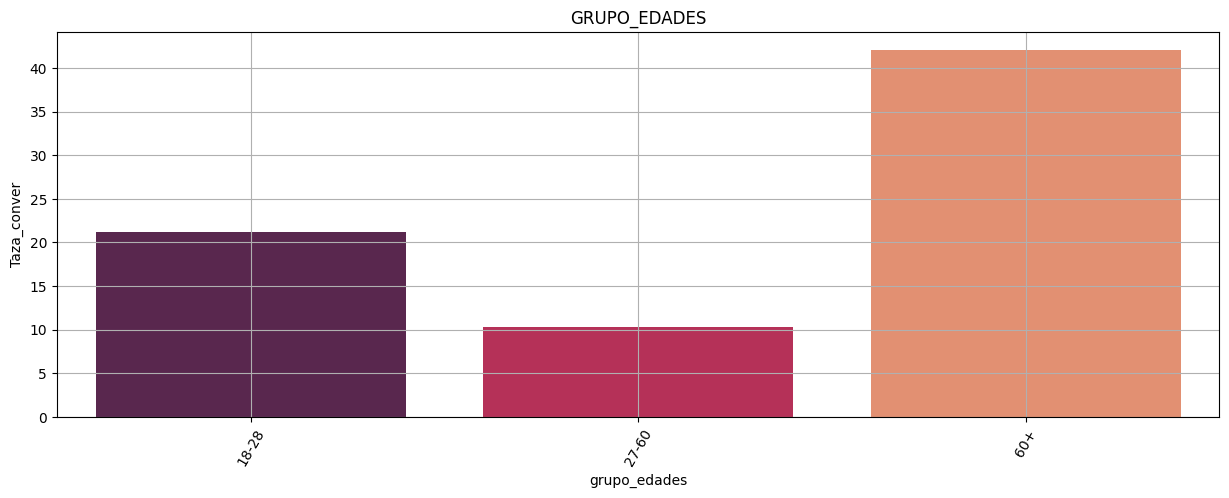

In [27]:
grafica_barras('grupo_edades')

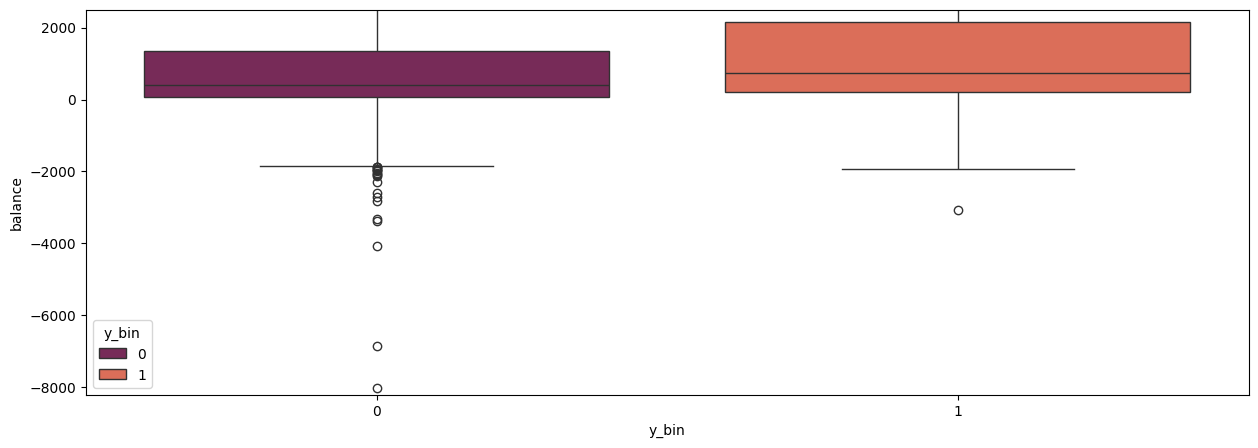

In [28]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='y_bin', y = 'balance', data=df_bancos_clean, hue='y_bin', palette='rocket')
plt.ylim(-8200, 2500)
plt.show()

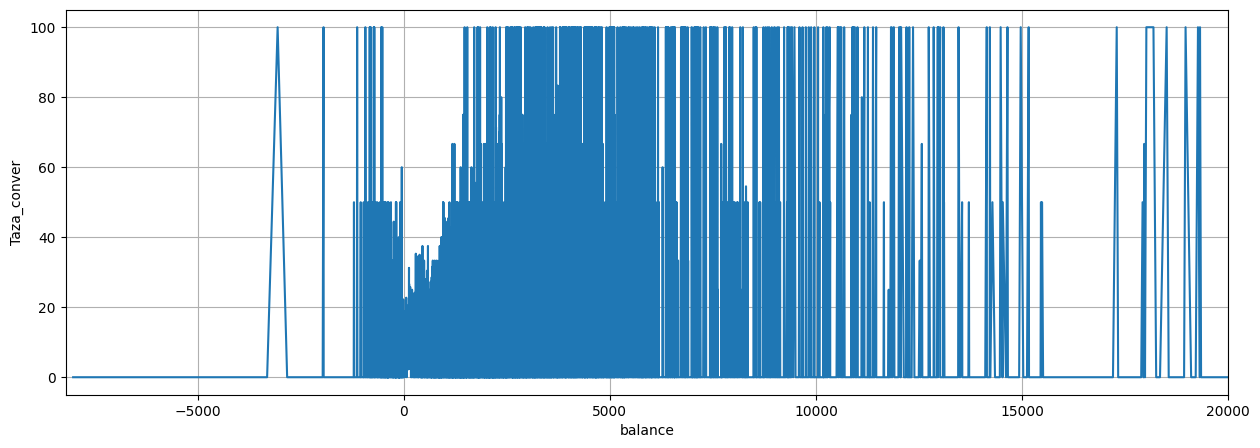

In [29]:
# Relacion de balance con la salida a√±o tras a√±o
grupo = df_bancos_clean.groupby('balance')['y_bin'].mean().mul(100).rename('Taza_conver').reset_index()
plt.figure(figsize=(15, 5))
sns.lineplot(x='balance', y='Taza_conver', data=grupo)
plt.xlim(-8200, 20000)
plt.grid()
plt.show()

In [34]:
# Crear una columna con subgrupos de balance
df_bancos_clean.loc[:, 'grupos_balance'] = '<0'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 0) & (df_bancos_clean['balance'] < 4800), 'grupos_balance'] = '0-4.8K'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 4800) & (df_bancos_clean['balance'] < 8000), 'grupos_balance'] = '4.8K-8K'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 8000) & (df_bancos_clean['balance'] < 12000), 'grupos_balance'] = '8K-12K'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 12000) & (df_bancos_clean['balance'] < 16000), 'grupos_balance'] = '12K-16K'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 16000) & (df_bancos_clean['balance'] < 20000), 'grupos_balance'] = '16K-20'
df_bancos_clean.loc[df_bancos_clean['balance'] > 20000, 'grupos_balance'] = '>20K'

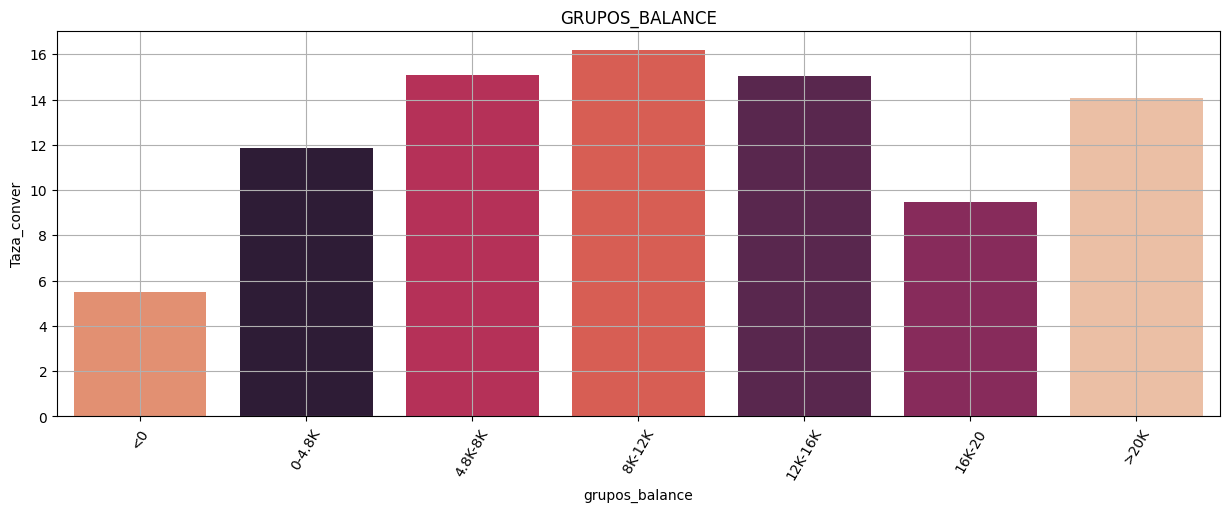

In [35]:
orden = ['<0', '0-4.8K', '4.8K-8K','8K-12K', '12K-16K', '16K-20', '>20K']
grafica_barras('grupos_balance', orden)

In [37]:
# Re codifico la columna con subgrupos de balance
df_bancos_clean.loc[:, 'grupos_balance'] = '<0'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 0) & (df_bancos_clean['balance'] < 4800), 'grupos_balance'] = '0-4.8K'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 4800) & (df_bancos_clean['balance'] < 16000), 'grupos_balance'] = '4.8K-16K'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 16000) & (df_bancos_clean['balance'] < 20000), 'grupos_balance'] = '16K-20'
df_bancos_clean.loc[df_bancos_clean['balance'] > 20000, 'grupos_balance'] = '>20K'

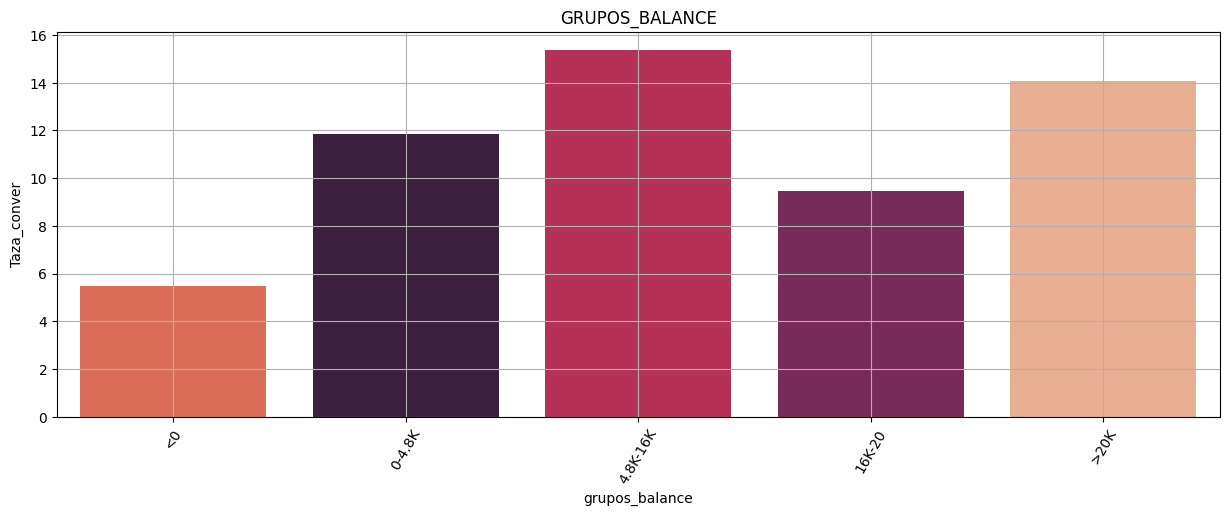

In [38]:
orden = ['<0', '0-4.8K', '4.8K-16K', '16K-20', '>20K']
grafica_barras('grupos_balance', orden)